# An introduction to seaborn

* Ref: [https://seaborn.pydata.org/introduction.html](https://seaborn.pydata.org/introduction.html)

## Our first seaborn plot

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None
['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[2 3 4 1 6 5]


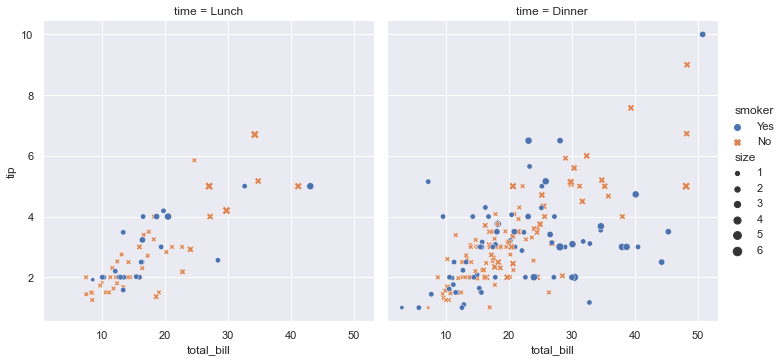

In [2]:
# import seaborn
import seaborn as sns

# apply the default theme
sns.set_theme()

# load an example dataset
tips = sns.load_dataset('tips')
display(tips.head())
print(tips.info())
print(tips['time'].unique())
print(tips['smoker'].unique())
print(tips['size'].unique())

# create a visualization
sns.relplot( # relation plot 可以顯示欄位之間的關係
    data=tips, # 指定使用哪個 dataframe
    x='total_bill',
    y='tip',
    col='time', # 看 col 指定的欄位有幾個不同的值，每一個值就畫一個 column
    hue='smoker', # 一張圖內的數據，用 hue 指定的欄位來分成不同的群體，會使用不同的顏色來標示
    style='smoker', # 依照 style 指定的欄位，用不同的 style (ex: marker area 或 symbol)
    size='size' # 依照 size 所指定的欄位的值來畫不同大小的點
)

## API abstraction across visualizations

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB
None
['dots' 'sacc']
['T1' 'T2']
[ 0.   3.2  6.4 12.8 25.6 51.2]


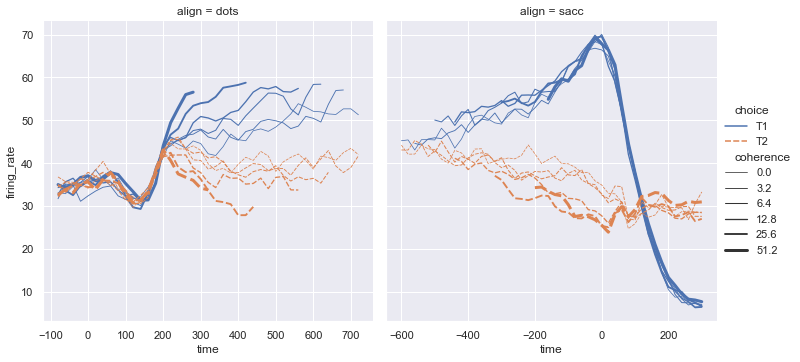

In [3]:
dots = sns.load_dataset('dots')
display(dots.head())
print(dots.info())
print(dots['align'].unique())
print(dots['choice'].unique())
print(dots['coherence'].unique())

sns.relplot(
    data=dots,
    kind='line', # relplot 除了可以畫成 scatter plot 之外，也可以畫成 line plot
    x='time',
    y='firing_rate',
    col='align', # 看 col 指定的欄位有幾個不同的值，每一個值就畫一個 column
    hue='choice', # 一張圖內的數據，用 hue 指定的欄位來分成不同的群體，會使用不同的顏色來標示
    size='coherence', # 依照 size 所指定的欄位的值來畫不同大小的點
    style='choice', # 依照 style 指定的欄位，用不同的 style (ex: line width 和 dashing)
    facet_kws={'sharex': False}
)

## Statistical estimation and error bars

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB
None
['parietal' 'frontal']
['stim' 'cue']


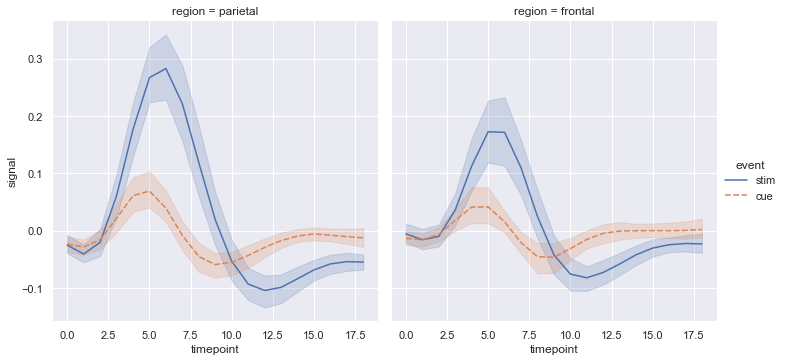

In [4]:
fmri = sns.load_dataset('fmri')
display(fmri.head())
print(fmri.info())
print(fmri['region'].unique())
print(fmri['event'].unique())

sns.relplot(
    data=fmri,
    kind='line', # relplot 除了可以畫成 scatter plot 之外，也可以畫成 line plot
    x='timepoint', # 注意這邊 x 有很多相同的數值，但是對應到不同的 y 值
    y='signal',    # 因此 seaborn 會把 y 值用平均值取代，並且在圖上加上 confidence intervals
    col='region', # 看 col 指定的欄位有幾個不同的值，每一個值就畫一個 column
    hue='event', # 一張圖內的數據，用 hue 指定的欄位來分成不同的群體，會使用不同的顏色來標示
    style='event' # 依照 style 指定的欄位，用不同的 style (ex: ine width 和 dashing)
)

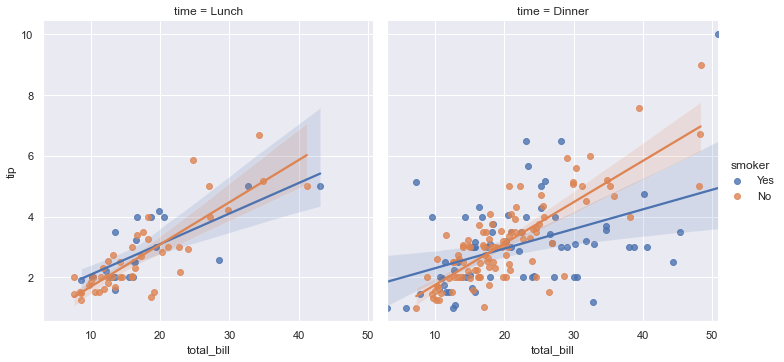

In [5]:
sns.lmplot( # lmplot() 會在 scatter plot 上加上 regression line
    data=tips, # 指定使用哪個 dataframe
    x='total_bill',
    y='tip',
    col='time', # 看 col 指定的欄位有幾個不同的值，每一個值就畫一個 column
    hue='smoker', # 一張圖內的數據，用 hue 指定的欄位來分成不同的群體，會使用不同的顏色來標示
)

## Informative distributional summaries

* `displot()` 和 `distplot()` 不一樣
* `displot()` 在 seaborn 0.11.0 才有
  * [https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)

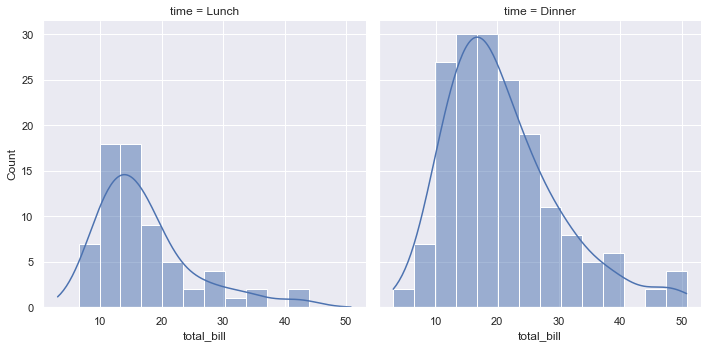

In [6]:
sns.displot(
    data=tips,
    x="total_bill",
    col="time",
    kde=True # 畫 kernel density
)

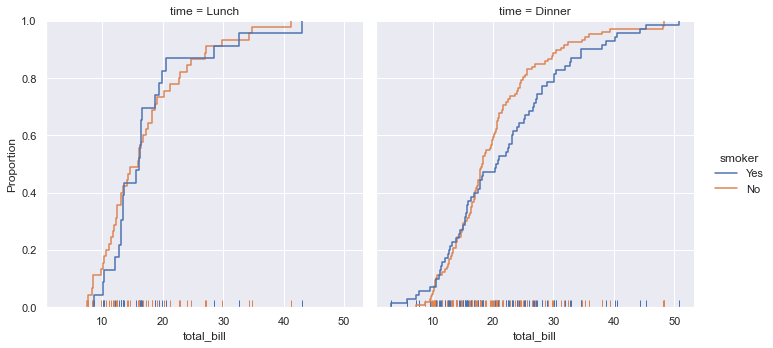

In [7]:
sns.displot(
    data=tips,
    kind="ecdf", # 畫 empirical cumulative distribution function
    x="total_bill",
    col="time",
    hue="smoker",
    rug=True
)

## Specialized plots for categorical data

* `catplot()`: 專門畫不同的 category 的東西的圖
* `catplot()` 有三種 `kind` 可以選擇
  * **swarm**: a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap
  * **violin**: use kernel density estimation to represent the underlying distribution that the points are sampled from
  * **bar**: show only the mean value and its confidence interval within each nested category

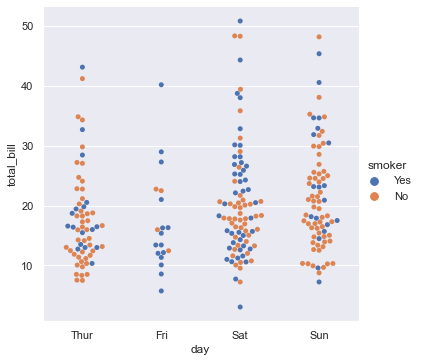

In [8]:
sns.catplot(
    data=tips,
    kind='swarm',
    x='day', # 用 x 軸所指明的欄位當作 category
    y='total_bill', # y 的值如果有重複時，就在旁邊畫一個新的點，不會與舊的點重疊
    hue='smoker' # 一張圖內的數據，用 hue 指定的欄位來分成不同的群體，會使用不同的顏色來標示
)

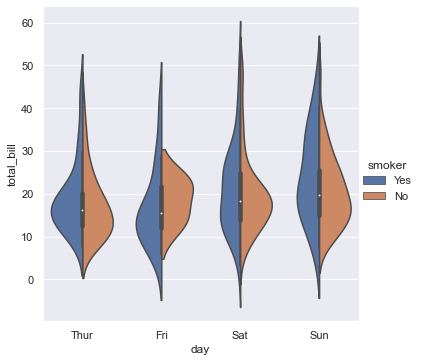

In [9]:
sns.catplot(
    data=tips,
    kind='violin',
    x='day', # 用 x 軸所指明的欄位當作 category
    y='total_bill', # 畫 kde 分佈圖
    hue='smoker', # 一張圖內的數據，用 hue 指定的欄位來分成不同的群體，會使用不同的顏色來標示
    split=True # 有 split=True 就每個 categore 只畫一個圖，用左右半邊表示
)

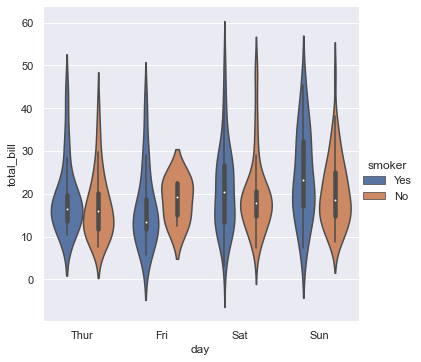

In [10]:
sns.catplot(
    data=tips,
    kind='violin',
    x='day',
    y='total_bill',
    hue='smoker' # 當沒指定 split=True 時，就對每個 category 畫 n 個群，n 是 hue 所指定的欄位的獨立數值
)

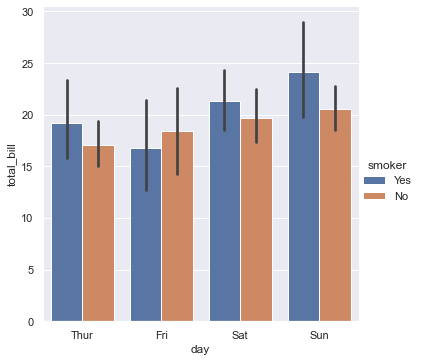

In [11]:
sns.catplot(
    data=tips,
    kind='bar', # y 軸顯示的是平均值和 confidence interval
    x='day',    # bar 代表平均值，CI 用黑線表示
    y='total_bill',
    hue='smoker'
)

## Composite views onto multivariate datasets
* `jointplot()`: focuses on a single relationship. It plots the joint distribution between two variables along with each variable’s marginal distribution:
   * 畫兩個變數之間的 scatter plot 放中間
   * 畫個別變數的 kde plot 放在上方跟右側
* `pairplot()`: takes a broader view: it shows joint and marginal distributions for all pairwise relationships and for each variable

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

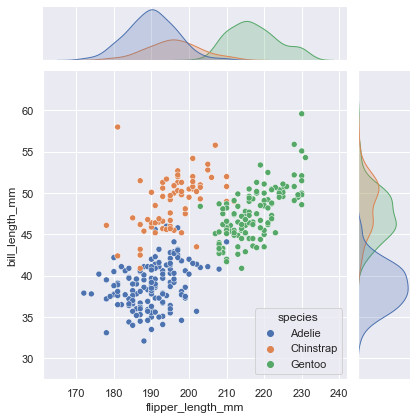

In [12]:
penguins = sns.load_dataset("penguins")
display(penguins.head())

sns.jointplot(
    data=penguins,
    x='flipper_length_mm',
    y='bill_length_mm',
    hue='species'
)

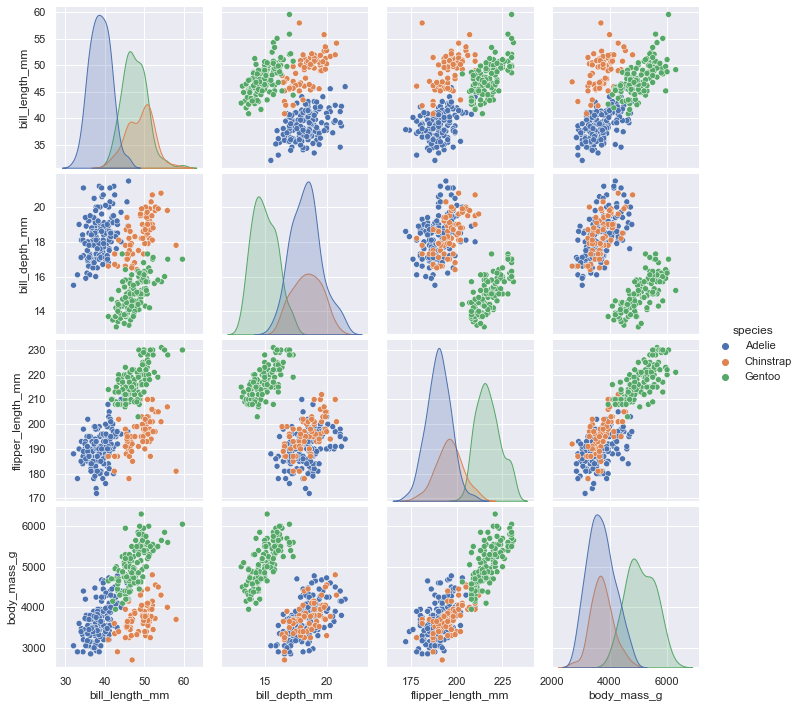

In [13]:
# pairplot() 會把 data 的全部數值型態的變數兩兩一組，拿來做圖
# 對角線的圖是變數跟自己本身，所以畫 kde plots
# 非對角線的圖是兩個不同的變數，所以畫 scatter plots
sns.pairplot(
    data=penguins,
    hue='species'
)

## Classes and functions for making complex graphics

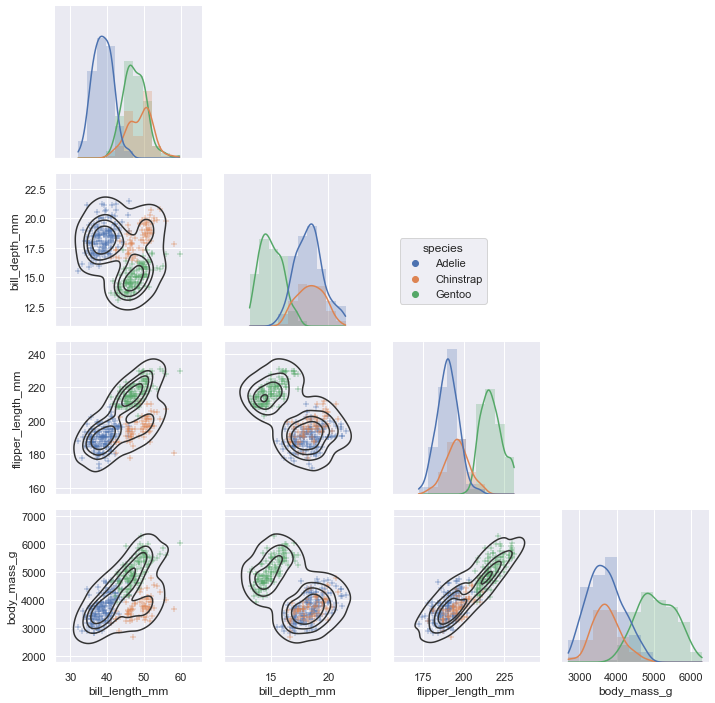

In [14]:
g = sns.PairGrid(penguins, hue='species', corner=True) # 這只是先畫出空的 grid 每個 sub plot 要畫什麼還要再指定
g.map_lower(sns.kdeplot, hue=None, levels=5, color='0.2') # map_lower() 指定對角線下方畫什麼圖，下圖中的等高線
g.map_lower(sns.scatterplot, marker='+') # 有很多個 map_lower() 的話，就是疊在同一張圖上，下圖中的散射點
g.map_diag(sns.histplot, element='step', linewidth=0, kde=True) # map_diag 指定對角線畫的是哪一種圖
g.add_legend(frameon=True) # 指定要畫 legend 且有邊框把 legend 框起來
g.legend.set_bbox_to_anchor((.61, .6)) # 指定 legend box 的位置

## Opinionated defaults and flexible customization

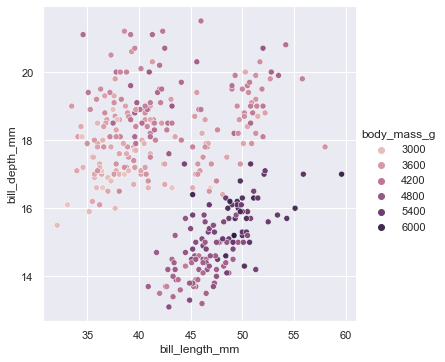

In [15]:
sns.relplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='body_mass_g' # body_mass_g 是數值欄位，所以分配顏色會是用漸層的顏色
)

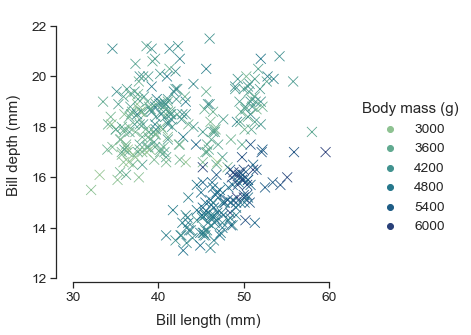

In [16]:
sns.set_theme(style="ticks", font_scale=1.25)

g = sns.relplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='body_mass_g',
    palette='crest', # 使用指定的 palette
    marker='x',
    s=100, # marker 的大小
)
g.set_axis_labels('Bill length (mm)', 'Bill depth (mm)', labelpad=10) # labelpad 是字和軸線的距離
g.legend.set_title('Body mass (g)')
g.fig.set_size_inches(6.5, 4.5) # 設定圖片 x (寬) 和 y (高) 的大小
g.ax.margins(.15) # 圖上的點和軸間隔 0.15
g.despine(trim=True) # x 和 y 軸要不要黏起來

---

# Overview of seaborn plotting functions

* Ref: [https://seaborn.pydata.org/tutorial/function_overview.html](https://seaborn.pydata.org/tutorial/function_overview.html)

## Similar functions for similar tasks

* seaborn 的圖主要分成三種
  * relational
  * distributional
  * categorical

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

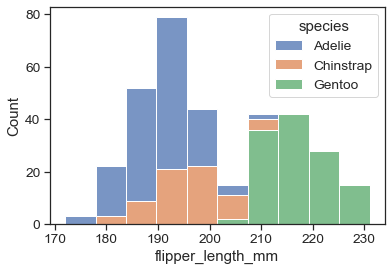

In [17]:
penguins = sns.load_dataset('penguins')

sns.histplot(
    data=penguins, 
    x='flipper_length_mm', 
    hue='species', 
    multiple='stack' # 疊在原先的 histogram 上面
)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

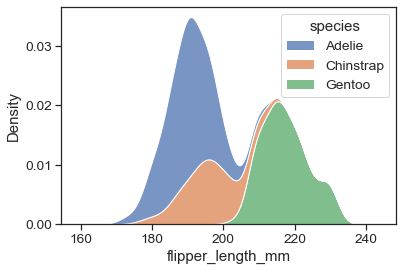

In [18]:
# kernel density estimation
sns.kdeplot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack'
)

## Figure-level vs. axes-level functions

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

* Axes-level 圖傳回的是 `matplotlib.pyplot.Axes` 物件
* Figure-level 圖傳回的是 seaborn 的 FaceGrid 物件
* 每個種類的圖只會有一個 figure-level 的函數
  * relation: `relplot()`
  * distribution: `displot()`
  * categorical: `catplot()`
* Figure-level plot 的 legend 在圖的外面，圖呈現正方形
* Axes-level plot 的 legend 在圖的內側，圖呈現長方形
* Figure-level plot 可以藉由改變參數而畫不同的圖
  * Figure-level plot 其實是呼叫子函數畫圖，給不同的參數就會呼叫不同的子函數
  * 需要去看子函數的可用參數有哪些
  

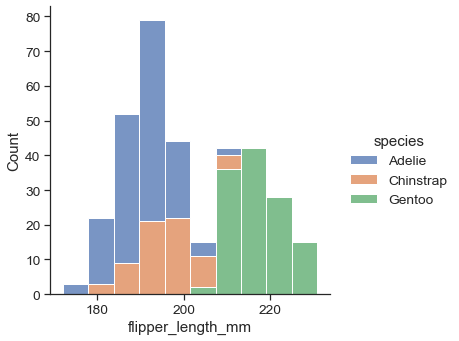

In [19]:
# displot() 預設是畫 histogram (用 histplot 畫)
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack'
)

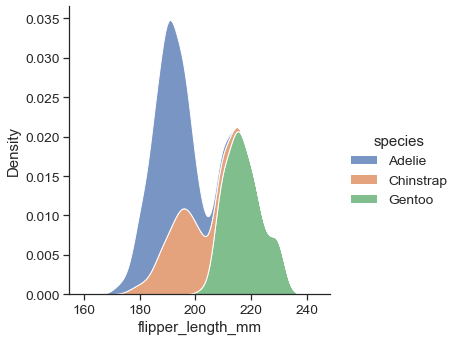

In [20]:
# 指定 kind 可以改畫其他的
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack',
    kind='kde' # kernal density estimation
)

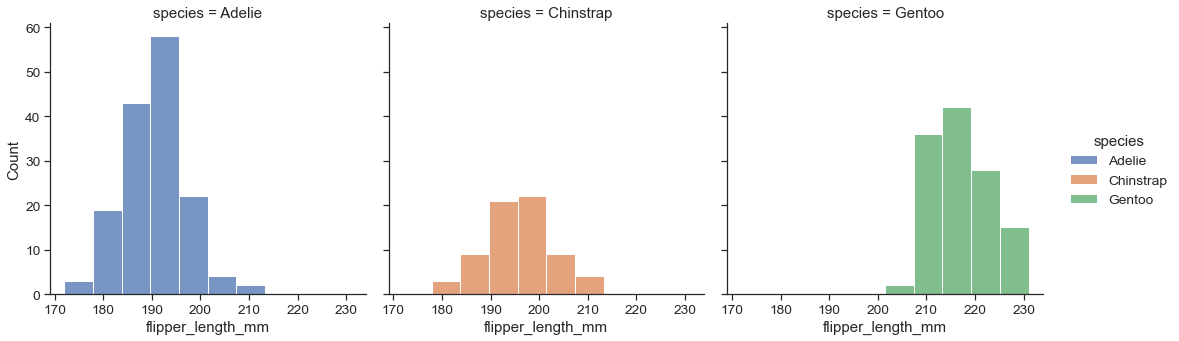

In [21]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    col='species' # 依照 col 指定的欄位分開畫圖
)

### Axes-level functions make self-contained plots

* Axes-level 的函數呼叫 `matplotlib.pyplot.gca()` 把圖畫在 currently-active axes 上，但是可以藉由指定 `ax=` 參數來將圖畫在某個特定的 axes 上

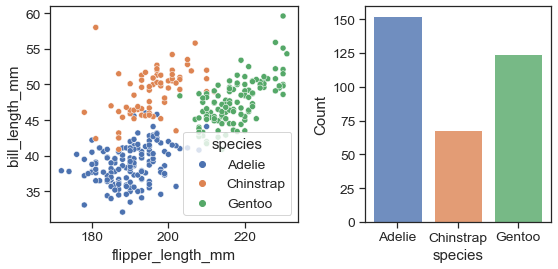

In [22]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(
    data=penguins,
    x='flipper_length_mm',
    y='bill_length_mm',
    hue='species',
    ax=axs[0]
)
sns.histplot(
    data=penguins,
    x='species',
    hue='species',
    shrink=.8,
    alpha=.8,
    legend=False,
    ax=axs[1]
)
f.tight_layout()

### Figure-level functions own their figure

* Figure-level 的函數無法指定畫在哪個 axes 上，會產生一張新的圖並傳回一個新的 FaceGrid 物件
  * 如果要更改圖的設定就要對這個 FacetGrid 物件進行操作

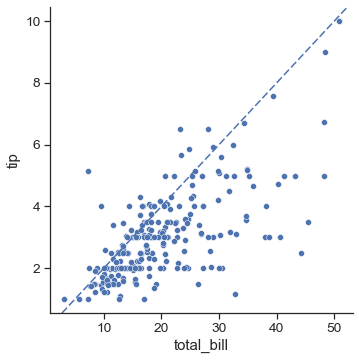

In [23]:
tips = sns.load_dataset('tips')
g = sns.relplot( # 傳回一個新的 seaborn 物件
        data=tips,
        x='total_bill',
        y='tip'
    )
g.ax.axline(xy1=(10, 2), slope=.2, color='b', dashes=(5, 2)) # 對物件做操作來改變圖的設定

### Customizing plots from a figure-level function

* Figure-level plot 傳回 FacetGrid 物件，所以可以用這個物件來對圖做一些設定

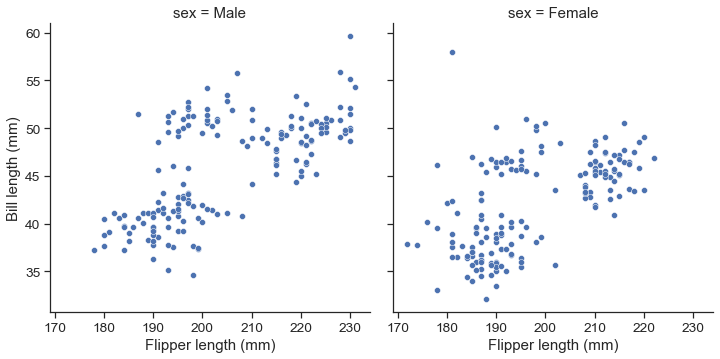

In [24]:
g = sns.relplot(
    data=penguins,
    x='flipper_length_mm',
    y='bill_length_mm',
    col='sex'
)
# 如果不指定 axis label 則用原本 column 的名字
g.set_axis_labels('Flipper length (mm)', 'Bill length (mm)')

### Specifying figure sizes

* figure 是指整張圖，plot 是指畫出來那個有 x, y 軸的那個部分
* matplotlib 中要改變 figure 的尺寸是藉由
  * 設定全域的 `rcParams`
    * `matplotlib.pyplot.subplots(figsize=(寬, 高))`
  * 呼叫 figure 物件來修改
    * `matplotlib.Figure.set_size_inches()`
* seaborn 用 `height`, `aspect` 來設定每個 subplot 的大小
  * width = height * aspect

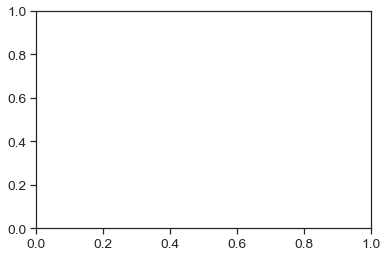

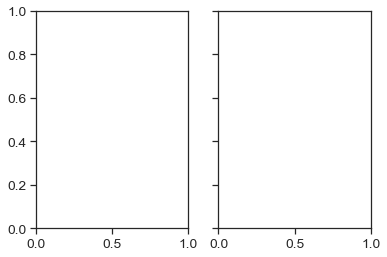

In [25]:
# matplotlib 的方式
f, ax = plt.subplots() # 畫一張圖 (figure)
f, ax = plt.subplots(1, 2, sharey=True) # 畫兩張 plots 但是是一個 figure，所以大小是和上一個一樣，但是 plots 會擠在一起

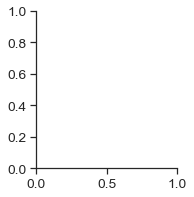

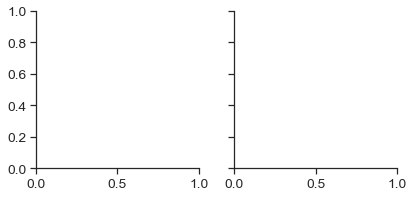

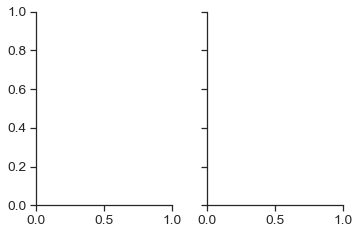

In [26]:
# seaborn 的方式
g = sns.FacetGrid(penguins) # 圖 (figure) 會是正方形
g = sns.FacetGrid(penguins, col="sex") # figure 會變大，所以單一的一個 plot 會和上一個一樣
g = sns.FacetGrid(penguins, col="sex", height=3.5, aspect=.75) # 改變 plot 的大小，會全部的 plots 都一起改變

### Relative merits of figure-level functions

|優點|缺點|
|:---|:---|
|Easy faceting by data variables|很多參數沒辦法在函數簽名中被找到|
|Legend 是在 plot 的外面|沒辦法變 matplotlib figure 的一部分|
|figure-level 圖的設定很簡單|和 matplotlib 用不同的 API|
|figure size 參數不同|figure size 參數不同|

* seaborn 建議盡量使用 figure-level 的圖
  * 只有在特殊情況才用 matplotlib 建立 figure 然後把 axes-level 的圖塞進去

## Combining multiple views on the data
* `jointplot()` `pairplot()` 會在一張圖 (figure) 內畫很多不同的小圖 (subplots)
  * `jointplot()` 中間畫兩個變數的 scatter plot，上方和右側畫每個變數的 distribution
  * `pairplot()` 畫全部變數兩兩之間的關係
  * `jointplot()` 和 `pairplot()` 本身是 figure-level functions
    * 小圖是 axes-level functions 
* 用 `JointGrid()` 和 `PairGrid()` 物件對 figure 做控制

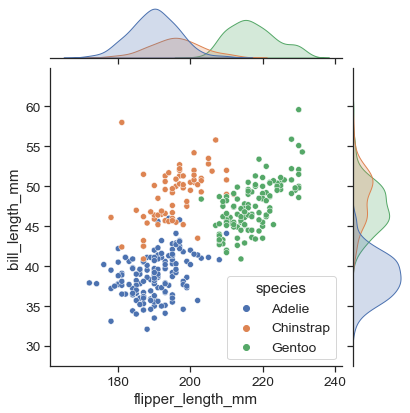

In [27]:
sns.jointplot(
    data=penguins,
    x='flipper_length_mm',
    y='bill_length_mm',
    hue='species'
)

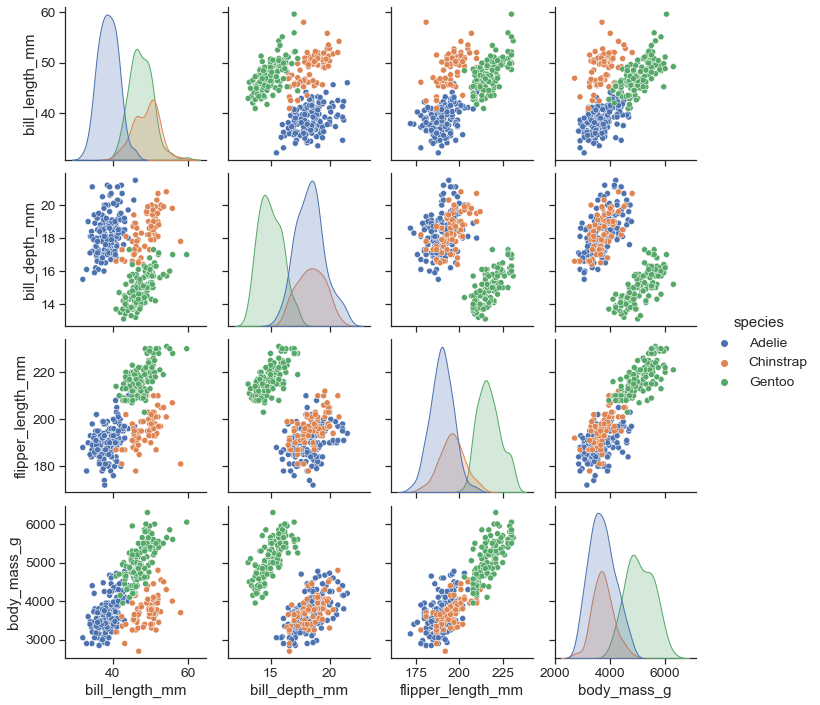

In [28]:
sns.pairplot(data=penguins, hue='species')

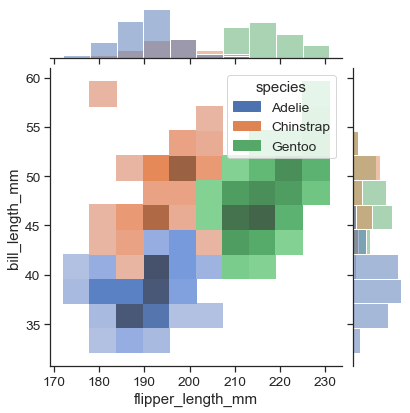

In [29]:
sns.jointplot(
    data=penguins,
    x='flipper_length_mm',
    y='bill_length_mm',
    hue='species',
    kind='hist' # 因為小圖是 axes-level 可以用 kind 來指定要用哪個 axes-level function 來畫圖
)

---

# Data structures accepted by seaborn

* Ref: [https://seaborn.pydata.org/tutorial/data_structure.html](https://seaborn.pydata.org/tutorial/data_structure.html)


* seaborn 接受輸入的資料格式有 pandas 和 numpy 的物件，或是 python 內建的 list dictionary
* 資料必須是 vector

## Long-form vs. wide-form data

![](https://seaborn.pydata.org/_images/data_structure_19_0.png)

* Long-form data
  * variable 是 column
  * observation 是 row
  * 比較常用 long-form data
* Wide-form data
  * variables 變成了表格的 dimensions，row 和 column 包含了變數的不同 levels
  * 就是 pivot table 的格式
    * 如果是 pandas dataframe 則只能有三個維度，並 seaborn 不支援 multi-index 的 pandas dataframe
  * 沒有指定 `x` 和 `y` 時，seaborn 就把輸入的資料當作是 wide-form table
    * dataframe 的 index 會變成 x 軸，value 變成 y 軸
  * 畫出的圖沒有 y label
  * 不論 column 的型態是什麼都會 seaborn 被當成 categorical 的

In [30]:
flights = sns.load_dataset('flights')
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

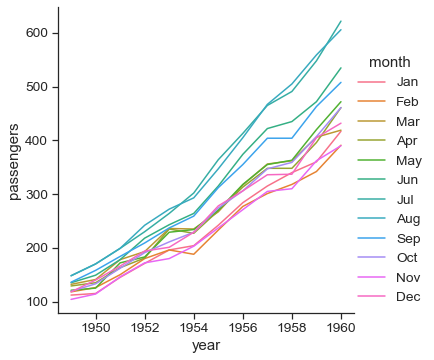

In [31]:
sns.relplot(
    data=flights,
    x='year',
    y='passengers',
    hue='month',
    kind='line'
)

In [32]:
flights_wide = flights.pivot(index='year', columns='month', values='passengers') # 變成 wide-form table
flights_wide.head()

month  Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
year                                                             
1949   112  118  132  129  121  135  148  148  136  119  104  118
1950   115  126  141  135  125  149  170  170  158  133  114  140
1951   145  150  178  163  172  178  199  199  184  162  146  166
1952   171  180  193  181  183  218  230  242  209  191  172  194
1953   196  196  236  235  229  243  264  272  237  211  180  201

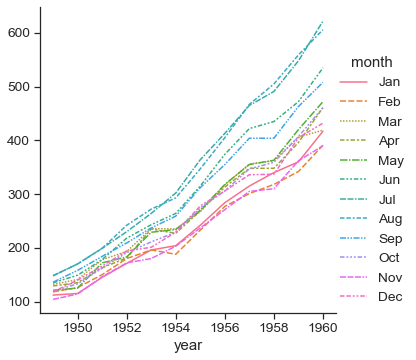

In [33]:
# 沒有指定 x 和 y 時，seaborn 就把輸入的資料當作是 wide-form table
# datafram 的 index 會當作 x
# datafram 的 values 會當作 y，但是因為 pivot 過後 cells 代表的是什麼，已經不見了，所以沒有 y label
sns.relplot(data=flights_wide, kind='line')

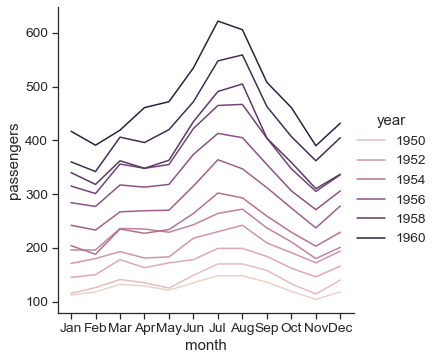

In [34]:
sns.relplot(
    data=flights,
    x='month',
    y='passengers',
    hue='year',
    kind='line'
)

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472

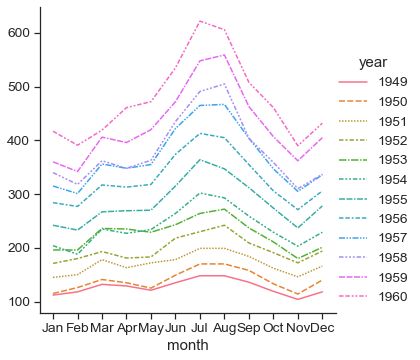

In [37]:
# 如果要用 wide-form data 畫出跟上面一樣的圖，就要先把 dataframe 做轉置
# 因為 wide-form dataframe 的 index 會被當成 x
display(flights_wide.transpose().head())

sns.relplot(data=flights_wide.transpose(), kind="line")

* wide-form data 話不同種類的圖時，index 和 column 哪個會被當作 x 哪個當作 y 沒有固定，所以無法預測畫出來的圖是怎樣子
  * 例如畫 relplot() 時，index 是 x, 然後每個 column 畫一條線
  * 例如畫 catplot() 時, column 是 x, 然後對 row 做 aggregation
* Seaborn 不支援超過 3 個變數的 wide-form data

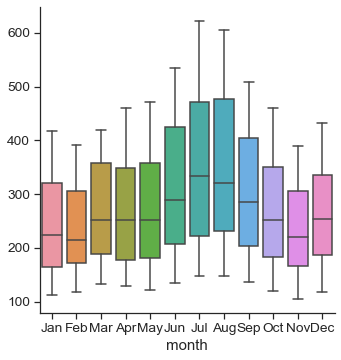

In [36]:
# 用 wide-form data 畫 catplot() 時，column 會被當成 x 然後把 rows 做 aggregation 
sns.catplot(data=flights_wide, kind='box')

## Messy data

* Long-form 和 wide-form 是 tiny data
* 不是 long-form wide-form 的資料就是 messy data
  * 通常就是重複測量造成 variable 不是唯一的
* 要先把 messy data 轉成 tiny data
  * 用 `pandas.DataFrame.melt()`

In [44]:
anagrams = sns.load_dataset('anagrams')
anagrams

subidr    attnr  num1  num2  num3
0        1  divided     2   4.0     7
1        2  divided     3   4.0     5
2        3  divided     3   5.0     6
3        4  divided     5   7.0     5
4        5  divided     4   5.0     8
5        6  divided     5   5.0     6
6        7  divided     5   4.5     6
7        8  divided     5   7.0     8
8        9  divided     2   3.0     7
9       10  divided     6   5.0     6
10      11  focused     6   5.0     6
11      12  focused     8   9.0     8
12      13  focused     6   5.0     9
13      14  focused     8   8.0     7
14      15  focused     8   8.0     7
15      16  focused     6   8.0     7
16      17  focused     7   7.0     6
17      18  focused     7   8.0     6
18      19  focused     5   6.0     6
19      20  focused     6   6.0     5

In [47]:
anagrams_long = anagrams.melt(id_vars=['subidr', 'attnr'], var_name='solutions', value_name='score')
anagrams_long
# anagrams_long.head()

subidr    attnr solutions  score
0        1  divided      num1    2.0
1        2  divided      num1    3.0
2        3  divided      num1    3.0
3        4  divided      num1    5.0
4        5  divided      num1    4.0
5        6  divided      num1    5.0
6        7  divided      num1    5.0
7        8  divided      num1    5.0
8        9  divided      num1    2.0
9       10  divided      num1    6.0
10      11  focused      num1    6.0
11      12  focused      num1    8.0
12      13  focused      num1    6.0
13      14  focused      num1    8.0
14      15  focused      num1    8.0
15      16  focused      num1    6.0
16      17  focused      num1    7.0
17      18  focused      num1    7.0
18      19  focused      num1    5.0
19      20  focused      num1    6.0
20       1  divided      num2    4.0
21       2  divided      num2    4.0
22       3  divided      num2    5.0
23       4  divided      num2    7.0
24       5  divided      num2    5.0
25       6  divided      num2    5.0
26       7  divided      num2    4.5
27       8  divided      num2    7.0
28       9  divided      num2    3.0
29      10  divided      num2    5.0
30      11  focused      num2    5.0
31      12  focused      num2    9.0
32      13  focused      num2    5.0
33      14  focused      num2    8.0
34      15  focused      num2    8.0
35      16  focused      num2    8.0
36      17  focused      num2    7.0
37      18  focused      num2    8.0
38      19  focused      num2    6.0
39      20  focused      num2    6.0
40       1  divided      num3    7.0
41       2  divided      num3    5.0
42       3  divided      num3    6.0
43       4  divided      num3    5.0
44       5  divided      num3    8.0
45       6  divided      num3    6.0
46       7  divided      num3    6.0
47       8  divided      num3    8.0
48       9  divided      num3    7.0
49      10  divided      num3    6.0
50      11  focused      num3    6.0
51      12  focused      num3    8.0
52      13  focused      num3    9.0
53      14  focused      num3    7.0
54      15  focused      num3    7.0
55      16  focused      num3    7.0
56      17  focused      num3    6.0
57      18  focused      num3    6.0
58      19  focused      num3    6.0
59      20  focused      num3    5.0

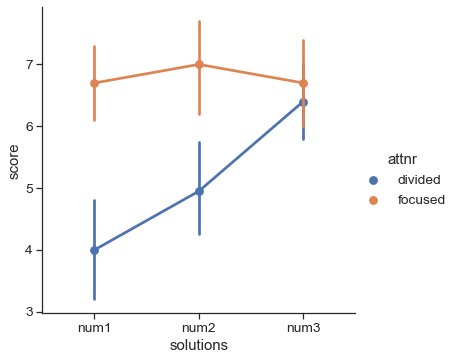

In [48]:
sns.catplot(
    data=anagrams_long,
    x='solutions',
    y='score',
    hue='attnr',
    kind='point'
)

## Options for visualizing long-form data

* 輸入的資料可以是 Pandas dataframe
* 輸入的資料可以是 dictionary
* 輸入的資料可以經過 aggregation 的
* 輸入的資料可以是 vector
* 輸入的資料可以是 numpy array
* 輸入的資料可以是 Python list

In [49]:
flights_dict = flights.to_dict()
print(flights_dict)

{'year': {0: 1949, 1: 1949, 2: 1949, 3: 1949, 4: 1949, 5: 1949, 6: 1949, 7: 1949, 8: 1949, 9: 1949, 10: 1949, 11: 1949, 12: 1950, 13: 1950, 14: 1950, 15: 1950, 16: 1950, 17: 1950, 18: 1950, 19: 1950, 20: 1950, 21: 1950, 22: 1950, 23: 1950, 24: 1951, 25: 1951, 26: 1951, 27: 1951, 28: 1951, 29: 1951, 30: 1951, 31: 1951, 32: 1951, 33: 1951, 34: 1951, 35: 1951, 36: 1952, 37: 1952, 38: 1952, 39: 1952, 40: 1952, 41: 1952, 42: 1952, 43: 1952, 44: 1952, 45: 1952, 46: 1952, 47: 1952, 48: 1953, 49: 1953, 50: 1953, 51: 1953, 52: 1953, 53: 1953, 54: 1953, 55: 1953, 56: 1953, 57: 1953, 58: 1953, 59: 1953, 60: 1954, 61: 1954, 62: 1954, 63: 1954, 64: 1954, 65: 1954, 66: 1954, 67: 1954, 68: 1954, 69: 1954, 70: 1954, 71: 1954, 72: 1955, 73: 1955, 74: 1955, 75: 1955, 76: 1955, 77: 1955, 78: 1955, 79: 1955, 80: 1955, 81: 1955, 82: 1955, 83: 1955, 84: 1956, 85: 1956, 86: 1956, 87: 1956, 88: 1956, 89: 1956, 90: 1956, 91: 1956, 92: 1956, 93: 1956, 94: 1956, 95: 1956, 96: 1957, 97: 1957, 98: 1957, 99: 1957, 

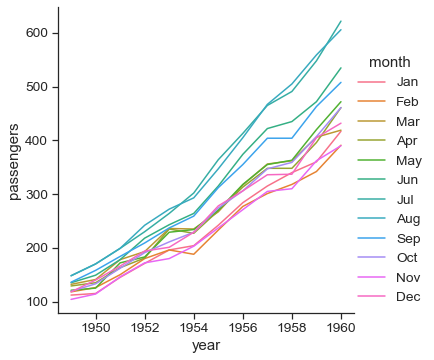

In [50]:
# 如果 data 是 dictionary 那 x, y, hue 就是用 key 表示
sns.relplot(
    data=flights_dict,
    x='year',
    y='passengers',
    hue='month',
    kind='line'
)

passengers
year            
1949  126.666667
1950  139.666667
1951  170.166667
1952  197.000000
1953  225.000000
1954  238.916667
1955  284.000000
1956  328.250000
1957  368.416667
1958  381.000000
1959  428.333333
1960  476.166667

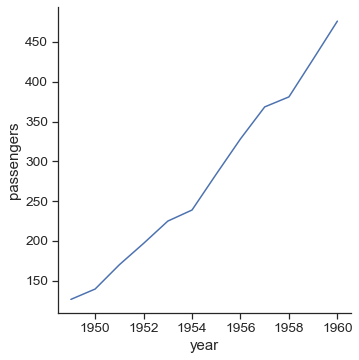

In [51]:
flights_avg = flights.groupby('year').mean()
display(flights_avg)

sns.relplot(
    data=flights_avg,
    x='year',
    y='passengers',
    kind='line'
)

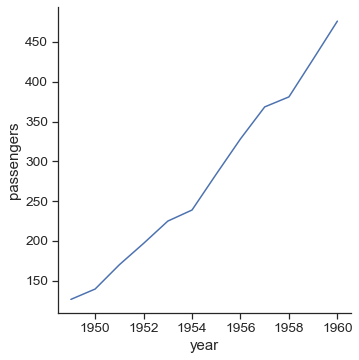

In [55]:
# 用 vector 當 x, y，如果 vector 有 name 屬性時，name 屬性就會被當成 x, y 的 label
year = flights_avg.index
passengers = flights_avg['passengers']

sns.relplot(x=year, y=passengers, kind='line')

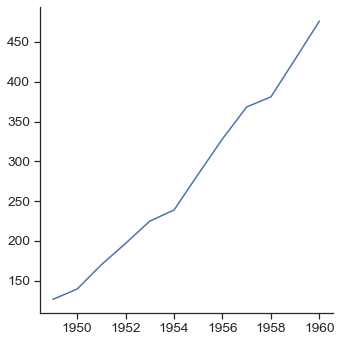

In [54]:
# numpy 物件也可以當作 x, y 但是因為 numpy 物件沒有 name 屬性，所以 x, y 就不會有 label
sns.relplot(x=year.to_numpy(), y=passengers.to_list(), kind='line')

## Options for visualizing wide-form data

* 只要是任何能表達成 vector 或 vector 的集合的格式都可以傳給 data 參數
  * vector 的集合中的每一個 vector 不需要有相同的長度，如果 vector 有 index 就會利用 index 來做排列
  * 如果用的是 pandas dataframe 那樣就可以使用 index 的 name 屬性當作 axes label

[year
1949    112
1950    115
1951    145
1952    171
1953    196
1954    204
1955    242
1956    284
1957    315
1958    340
1959    360
1960    417
Name: Jan, dtype: int64, year
1949    118
1950    126
1951    150
1952    180
1953    196
1954    188
1955    233
1956    277
1957    301
1958    318
1959    342
1960    391
Name: Feb, dtype: int64, year
1949    132
1950    141
1951    178
1952    193
1953    236
1954    235
1955    267
1956    317
1957    356
1958    362
1959    406
1960    419
Name: Mar, dtype: int64, year
1949    129
1950    135
1951    163
1952    181
1953    235
1954    227
1955    269
1956    313
1957    348
1958    348
1959    396
1960    461
Name: Apr, dtype: int64, year
1949    121
1950    125
1951    172
1952    183
1953    229
1954    234
1955    270
1956    318
1957    355
1958    363
1959    420
1960    472
Name: May, dtype: int64, year
1949    135
1950    149
1951    178
1952    218
1953    243
1954    264
1955    315
1956    374
1957    422
1958    435
1959

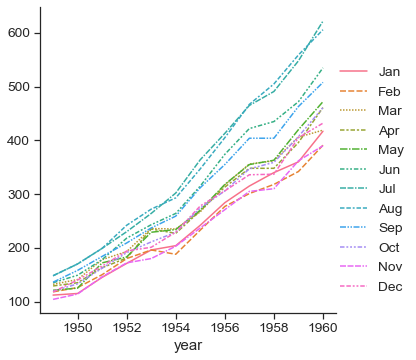

In [56]:
flights_wide_list = [col for _, col in flights_wide.items()]
print(flights_wide_list)

sns.relplot(data=flights_wide_list, kind='line')

[year
1949    112
1950    115
1951    145
1952    171
1953    196
1954    204
1955    242
Name: Jan, dtype: int64, year
1952    242
1953    272
1954    293
1955    347
1956    405
1957    467
1958    505
1959    559
1960    606
Name: Aug, dtype: int64]


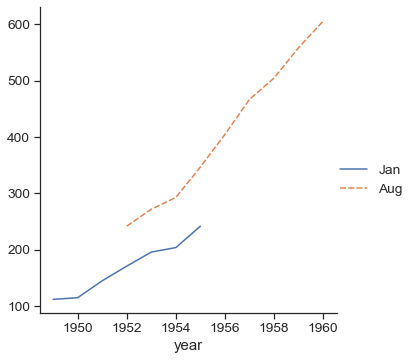

In [59]:
# 兩個不同長度的 vectors 組成一個 vector 的集合
two_series = [flights_wide.loc[:1955, 'Jan'], flights_wide.loc[1952:, 'Aug']]
print(two_series)

sns.relplot(data=two_series, kind='line')

[array([112, 115, 145, 171, 196, 204, 242]), array([242, 272, 293, 347, 405, 467, 505, 559, 606])]


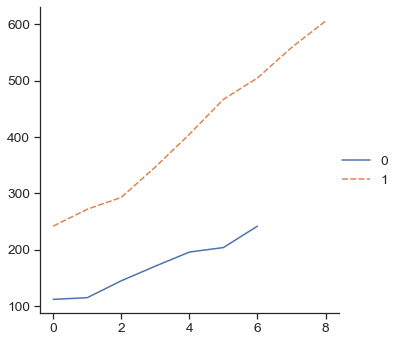

In [65]:
# numpy array 的 index 是從 0 開始的
two_arrays = [s.to_numpy() for s in two_series]
print(two_arrays)

# 兩條線的名字就用 two_arrays 的 index 來表示
# 線的每一個點就按照 numpy array 的 index 分配
sns.relplot(data=two_arrays, kind='line')

{'Jan': array([112, 115, 145, 171, 196, 204, 242]), 'Aug': array([242, 272, 293, 347, 405, 467, 505, 559, 606])}


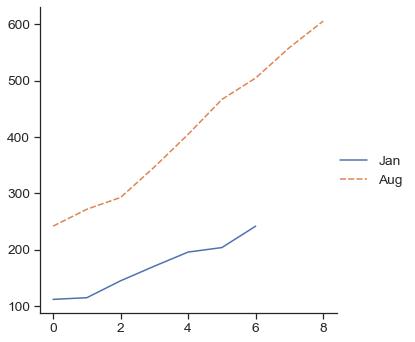

In [64]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
print(two_arrays_dict)

# 線的名字就用 dict 的 key
# 因為 value 是 numpy array, 所以線的每一個點就照 index 來分配
sns.relplot(data=two_arrays_dict, kind='line')

[[112 118 132 129 121 135 148 148 136 119 104 118]
 [115 126 141 135 125 149 170 170 158 133 114 140]
 [145 150 178 163 172 178 199 199 184 162 146 166]
 [171 180 193 181 183 218 230 242 209 191 172 194]
 [196 196 236 235 229 243 264 272 237 211 180 201]
 [204 188 235 227 234 264 302 293 259 229 203 229]
 [242 233 267 269 270 315 364 347 312 274 237 278]
 [284 277 317 313 318 374 413 405 355 306 271 306]
 [315 301 356 348 355 422 465 467 404 347 305 336]
 [340 318 362 348 363 435 491 505 404 359 310 337]
 [360 342 406 396 420 472 548 559 463 407 362 405]
 [417 391 419 461 472 535 622 606 508 461 390 432]]


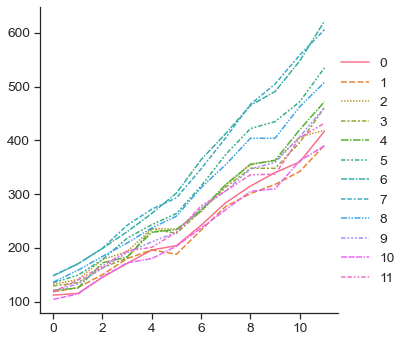

In [66]:
# 2 維的 numpy array 就相當於是沒有 index 資訊的 pandas dataframe
# 每個 column 會畫一條線
flights_array = flights_wide.to_numpy()
print(flights_array)

sns.relplot(data=flights_array, kind='line')

---

# Visualizing statistical relationships

* Ref: [https://seaborn.pydata.org/tutorial/relational.html](https://seaborn.pydata.org/tutorial/relational.html)

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

* `relplot()`
  * 畫變數之間的關係
    * 二維的圖，但是可以藉由設定 `hue`, `size`, `style` 參數來顯示更高的維度
  * 可以畫 scatter plot 或是 line plot
    * `kind=scatter` 畫 scatter plot (預設)
    * `kind=line` 畫 line plot
  * 是 figure-level function
  * 底下有 `scatterplot()` 和 `lineplot()`，這兩個都是 axes-level functions
    * 其實 `kind` 呼叫的就是這兩個
  
## Relating variables with scatter plots

* 可以用 `relplot()` 或是 `scatterplot()`

In [68]:
tips = sns.load_dataset('tips')
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [70]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [69]:
print(tips['sex'].unique())
print(tips['smoker'].unique())
print(tips['day'].unique())
print(tips['time'].unique())
print(tips['size'].unique())

['Female', 'Male']
Categories (2, object): ['Female', 'Male']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']
['Dinner', 'Lunch']
Categories (2, object): ['Dinner', 'Lunch']
[2 3 4 1 6 5]


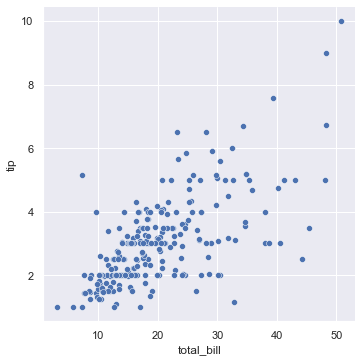

In [71]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip'
)

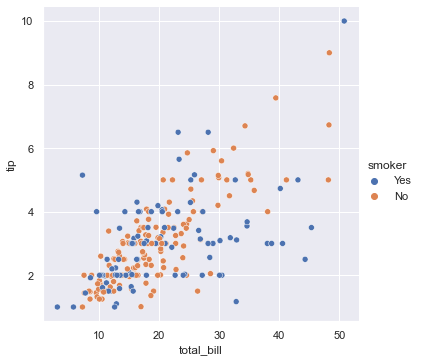

In [73]:
# 用 hue 新增一個維度
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker' # 新增了一個維度，用不同的顏色來區分
)

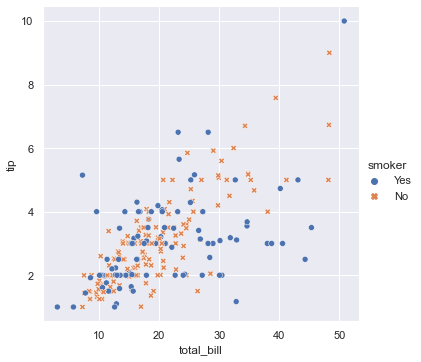

In [74]:
# 用 style 新增一個維度
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker', # 新增了一個維度，用不同的顏色來區分
    style='smoker', # 依照 stlye 指明的欄位的不同值，畫不同的 markers
)

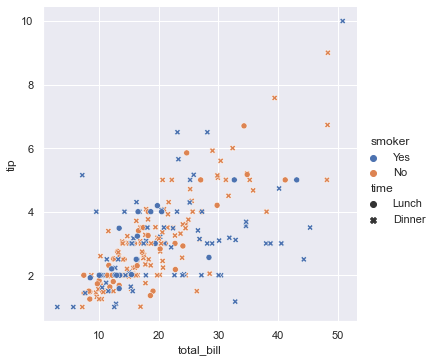

In [75]:
# style 和 hue 指明的欄位可以不同
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker', # 新增了一個維度，用不同的顏色來區分
    style='time', # 依照 stlye 指明的欄位的不同值，畫不同的 markers
)

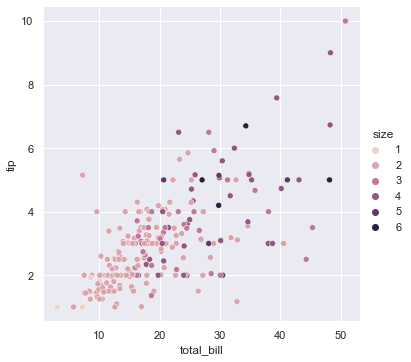

In [76]:
# hue 欄位是 categorical 型態時，用 qualitative palette，不同的值時顏色明顯會不同
# hue 欄位是 numerical 型態時，用 sequential palette，不同的值時顏色是不同漸層
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='size', # size 是 numerical 型態的，所以顏色用漸層區分
)

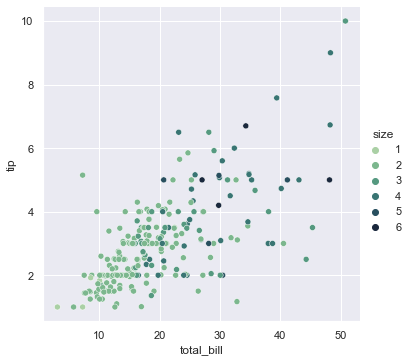

In [77]:
# 不用預設的 palette 而用自定的
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='size', # size 是 numerical 型態的
    palette='ch:r=-.5,l=.75' # 也可以用指定的 palette 來畫圖 
)

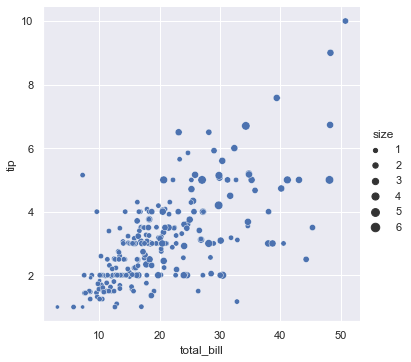

In [78]:
# 用 size 新增一個維度
# 但是 marker 的大小並不是照 size 所指定的值，而是自動分派的大小
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    size='size', # size 是 numerical 型態的
)

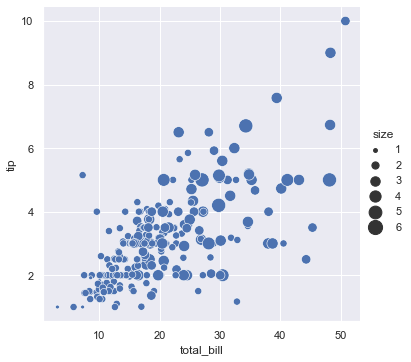

In [79]:
# 用 size 新增一個維度
# 但是 marker 的大小並不是照 size 所指定的值，而是用 sizes 指定 marker 大小的範圍
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    size='size', # size 是 numerical 型態的
    sizes=(15, 200) # marker 的大小介於 15 到 200
)

## Emphasizing continuity with line plots

* 可以用 `relplot(kind="line")` 或是 `lineplot()`
* 畫 line plot 時，seaborn 會先依照 x 的值做排序，然後才畫圖

time     value
0     0  0.131403
1     1  0.944926
2     2 -0.059932
3     3  0.825861
4     4  0.108808

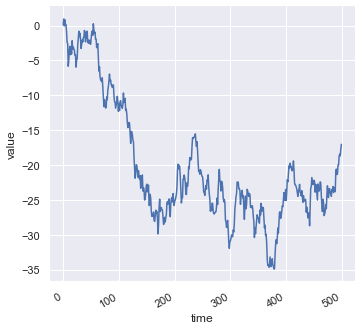

In [95]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum())) # 照 normal 分布隨機產生 500 個點，然後對這結果做 cumsum()
display(df.head())

g= sns.relplot(
    data=df,
    x='time',
    y='value',
    kind='line'
)
g.fig.autofmt_xdate()

x         y
0 -0.964657 -1.798266
1 -0.437748 -0.576990
2 -1.597248  0.608927
3 -1.898003  3.868282
4 -2.012847  3.586317

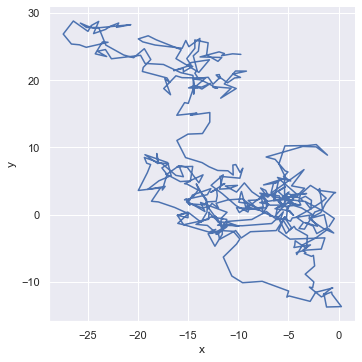

In [96]:
# 關掉排序
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), # 照 normal 分佈產生 500 x 2 矩陣，然後沿著 column 方向做 cumsum()
                  columns=['x', 'y'])
display(df.head())

sns.relplot(
    data=df,
    x='x',
    y='y',
    sort=False, # 關掉 sorting
    kind='line'
)

### Aggregation and representing uncertainty

* 如果一個 x 對應到很多個 y 時，seaborn 預設會取平均值，然後畫上 95% confidence interval
  * 通常都是重複測量時會有這種狀況
  * Confidence interval 是採用 bootstrapping 來求得的，對於大的 dataset 會很耗時間
    * 可以用 `ci=None` 關掉
    * 可以用 standard deviation `ci=sd` 代替
  * 可以用 `estimator=None` 關掉 aggregation

In [97]:
fmri = sns.load_dataset('fmri')
fmri.head()

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033
3     s11         18  stim  parietal -0.046134
4     s10         18  stim  parietal -0.037970

In [99]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [100]:
for col in fmri.columns:
    if col != 'signal':
        s = fmri[col].unique()
        print(f'{col}: {s}')

subject: ['s13' 's5' 's12' 's11' 's10' 's9' 's8' 's7' 's6' 's4' 's3' 's2' 's1' 's0']
timepoint: [18 14 17  9 16 15  0 13 12 11 10  3  7  8  2  6  5  4  1]
event: ['stim' 'cue']
region: ['parietal' 'frontal']


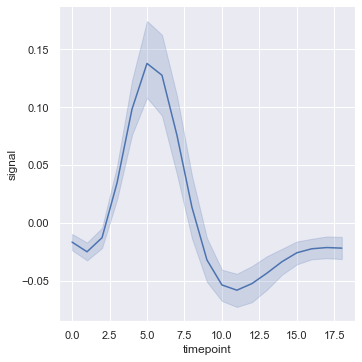

In [101]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    kind='line'
)

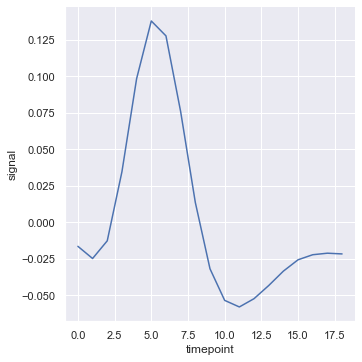

In [102]:
# 可以把 95% CI 區間關掉
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    ci=None, # 關掉 CI 區間
    kind='line'
)

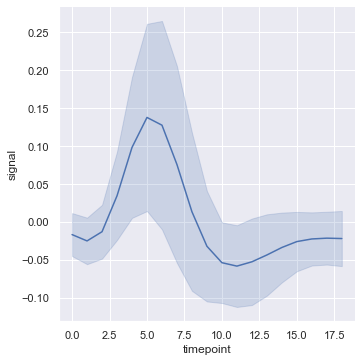

In [103]:
# 也可以畫 standard deviation
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    ci='sd', # 畫 std 區間
    kind='line'
)

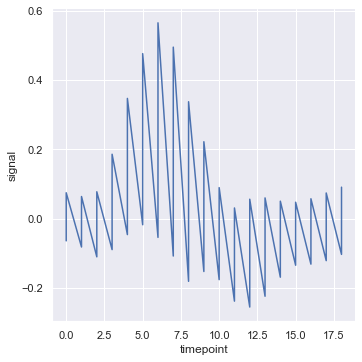

In [104]:
# 也可以關掉 aggregation 但是圖可能變得奇怪
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    estimator=None, # 關掉 aggregation
    kind='line'
)

### Plotting subsets of data with semantic mappings

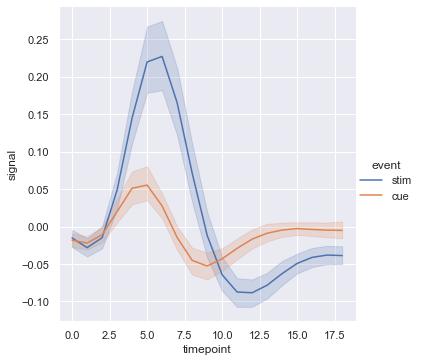

In [105]:
# 使用 hue 畫三個維度，會用不同的顏色
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='event', # 看 event 有幾個不同的類別就畫幾條線，然後對各自的類別做 aggregation 和求 CI
    kind='line'
)

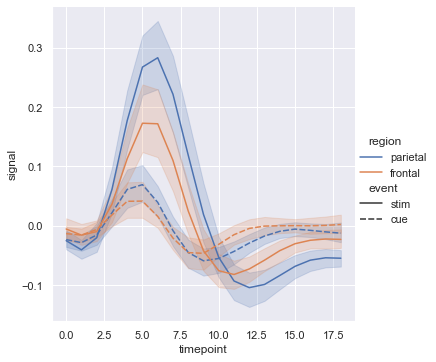

In [106]:
# 畫四個維度
# hue 用不同顏色
# style 用不同的線
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='region',
    style='event',
    kind='line'
)

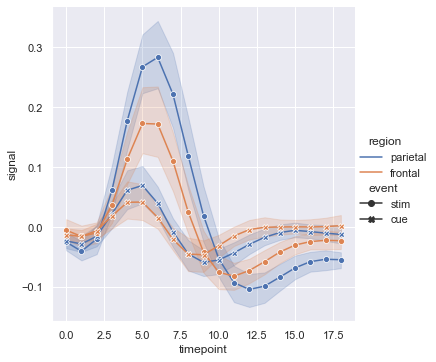

In [109]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='region',
    style='event',
    dashes=False, # 不要用 dash 線
    markers=True, # 改用不同 marker 來表示
    kind='line'
)

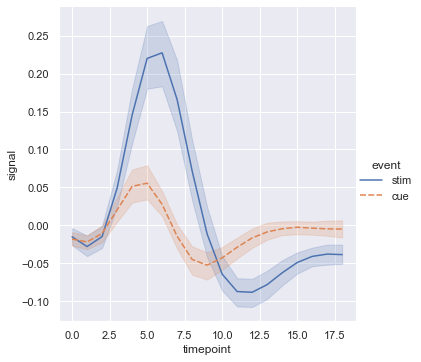

In [110]:
# 如果 hue 和 style 都是用同一個欄位，那線的顏色跟種類會有變化，黑白印刷時就能分辨
# hue 改變顏色
# style 改變線的種類
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='event',
    style='event',
    kind='line'
)

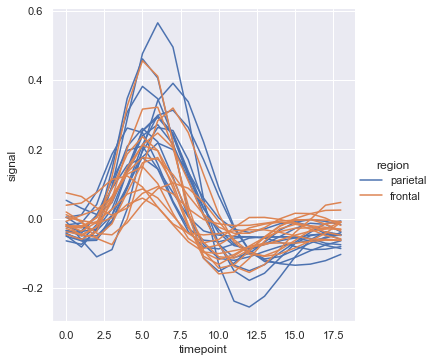

In [111]:
# 如果有重複測量時，也可以把每次測量的結果畫在同一張圖
sns.relplot(
    data=fmri.query('event == "stim"'), # 只選出某特定 event
    x='timepoint',
    y='signal',
    hue='region',
    units='subject', # 每個不同的 subject 就畫一條線
    estimator=None, # 關掉 aggregation
    kind='line'
)

In [112]:
dots = sns.load_dataset('dots').query('align == "dots"')
dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

In [113]:
dots.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 393
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        394 non-null    object 
 1   choice       394 non-null    object 
 2   time         394 non-null    int64  
 3   coherence    394 non-null    float64
 4   firing_rate  394 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 18.5+ KB


In [114]:
for col in dots.columns:
    if col != 'firing_rate':
        s = dots[col].unique()
        print(f'{col}: {s}')

align: ['dots']
choice: ['T1' 'T2']
time: [-80 -60 -40 -20   0  20  40  60  80 100 120 140 160 180 200 220 240 260
 280 300 320 340 360 380 400 420 440 460 480 500 520 540 560 580 600 620
 640 660 680 700 720]
coherence: [ 0.   3.2  6.4 12.8 25.6 51.2]


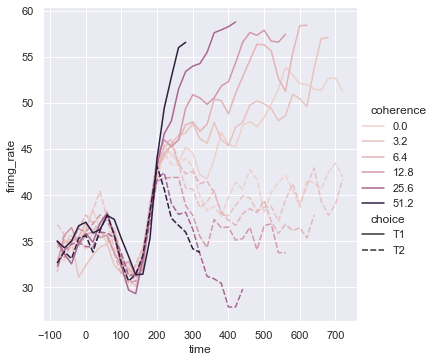

In [115]:
sns.relplot(
    data=dots,
    x='time',
    y='firing_rate',
    hue='coherence', # coherence 是 numerical 的所以顏色用漸層
    style='choice',
    kind='line'
)

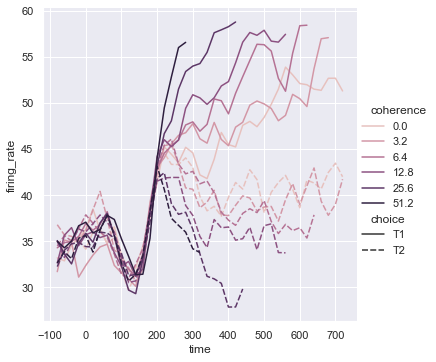

In [116]:
# 用自訂的 palette
palette = sns.cubehelix_palette(light=.8, n_colors=6) # 設定 palette

sns.relplot(
    data=dots,
    x='time',
    y='firing_rate',
    hue='coherence',
    style='choice',
    palette=palette, # 使用自訂的 palette
    kind='line'
)

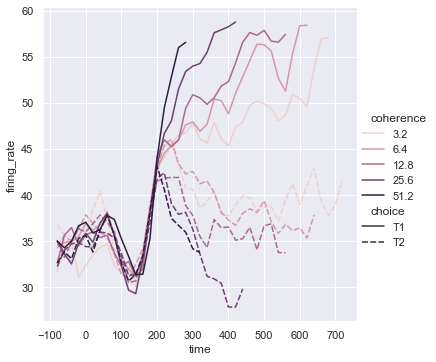

In [120]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)

sns.relplot(
    data=dots.query('coherence > 0'),
    x='time',
    y='firing_rate',
    hue='coherence',
    hue_norm=LogNorm(),
    style='choice',
    kind='line'
)

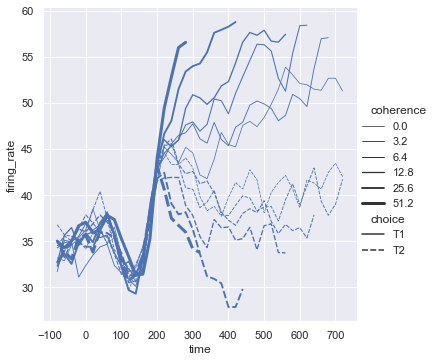

In [121]:
# size 會改變線的寬度
sns.relplot(
    data=dots,
    x='time',
    y='firing_rate',
    size='coherence', # 線的寬度
    style='choice', # 線的種類
    kind='line'
)

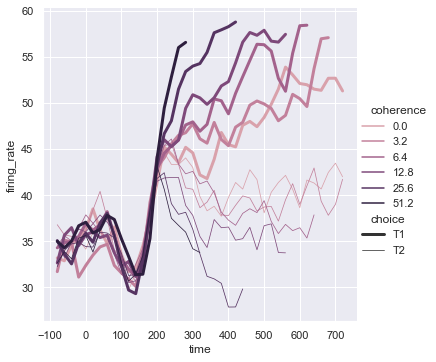

In [122]:
sns.relplot(
    data=dots,
    x='time',
    y='firing_rate',
    hue='coherence',
    size='choice',
    palette=palette, # 用自訂的 palette
    kind='line'
)

### Plotting with date data

time     value
0 2017-01-01  0.223215
1 2017-01-02  0.228203
2 2017-01-03 -1.307277
3 2017-01-04 -0.681943
4 2017-01-05 -0.739013

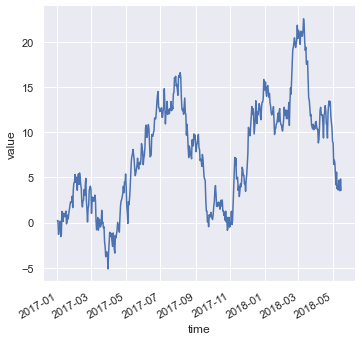

In [123]:
df = pd.DataFrame(dict(time=pd.date_range('2017-1-1', periods=500),
                       value=np.random.randn(500).cumsum()))
display(df.head())

g = sns.relplot(
    data=df,
    x='time',
    y='value',
    kind='line'
)
g.fig.autofmt_xdate() # 自動把日期 ticks 弄好

## Showing multiple relationships with facets

* 用 `FaceGrid()` 畫多張圖

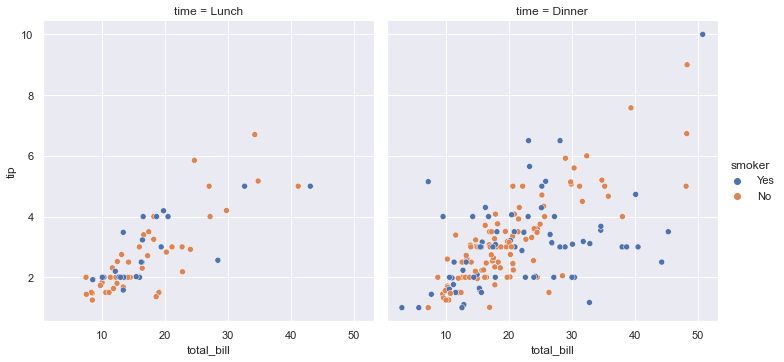

In [124]:
sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='smoker',
    col='time' # 其實會呼叫 FaceGrid() 依照 col 指定的欄位畫多張圖
)

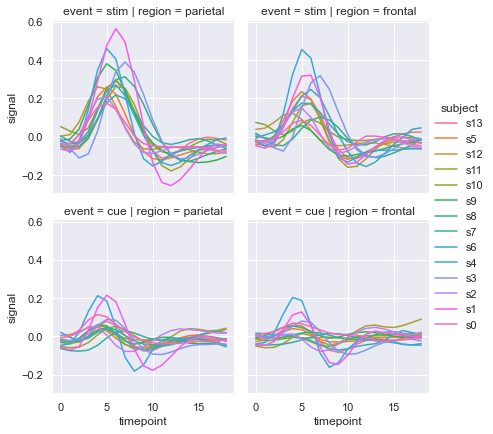

In [125]:
sns.relplot(
    data=fmri,
    x='timepoint',
    y='signal',
    hue='subject',
    col='region', # col 和 row 都是用 FaceGrid 來畫 
    row='event', #  multiple plots 的
    height=3, # 每一張小圖的高度
    kind='line'
)

* 下面的圖又叫做 lattice plots 或 small-multiples
  * 就是 col 太多的時候可以用 `col_wrap` 換到下一列繼續畫

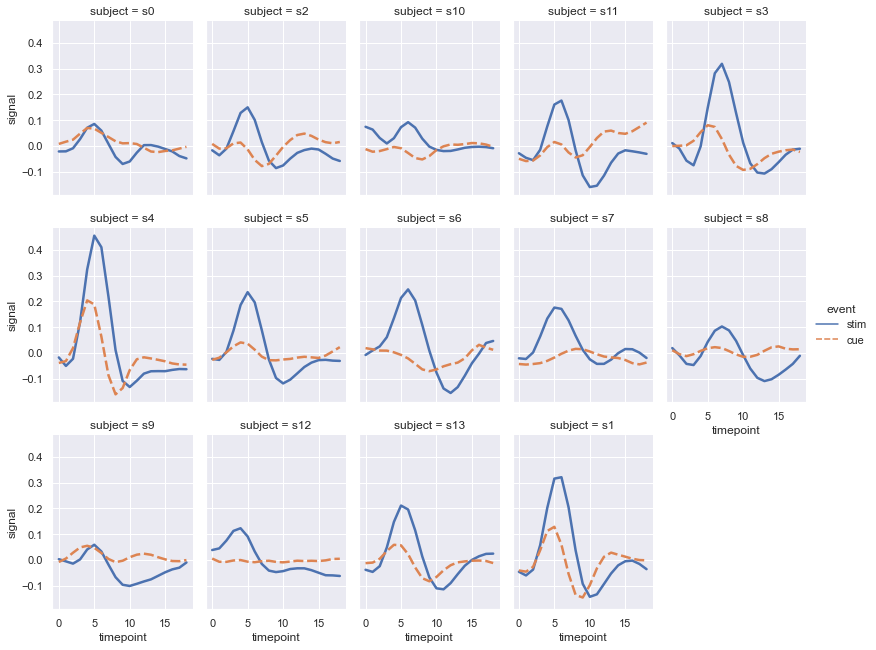

In [126]:
sns.relplot(
    data=fmri.query('region == "frontal"'),
    x='timepoint',
    y='signal',
    hue='event',
    style='event',
    col='subject',
    col_wrap=5, # 一列有 5 個小圖
    height=3, # 每個小圖的高度
    aspect=.75, # 每個小圖的寬度是 height * aspect
    linewidth=2.5,
    kind='line'
)

---

# Visualizing distributions of data

* Ref: [https://seaborn.pydata.org/tutorial/distributions.html](https://seaborn.pydata.org/tutorial/distributions.html)


* `displot()`, `jointplot()`, `pariplot()` 是 figure-level 的
* `histplot()`, `kdeplot()`, `ecfplot()`, `rugplot()` 是 axes-level 的

## Plotting univariate histograms

* `displot()` 預設是畫 histogram (會呼叫 `histplot()` 來畫圖)

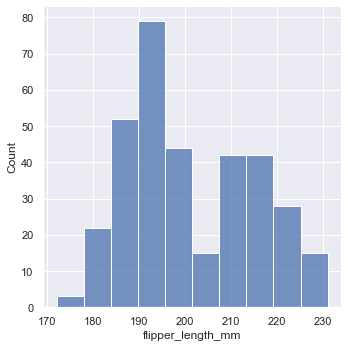

In [127]:
penguins = sns.load_dataset('penguins')

sns.displot(
    penguins,
    x='flipper_length_mm'
)

### Choosing the bin size

* 用 `binwidth` 或是 `bins` 來設定 bin size

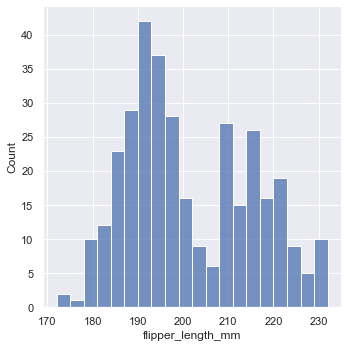

In [128]:
# seaborn 會自動計算 bin size 但是也可以自訂
sns.displot(
    penguins,
    x='flipper_length_mm',
    binwidth=3 # 自訂 bin size
)

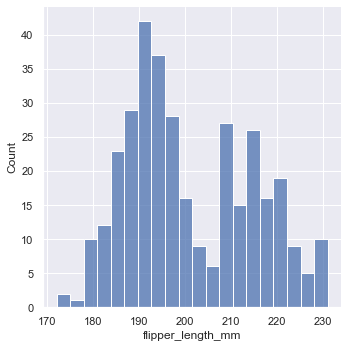

In [129]:
# 指定用幾個 bins 然後 seaborn 會自動算 bin size
sns.displot(
    penguins,
    x='flipper_length_mm',
    bins=20 # 指定要用幾個 bins
)

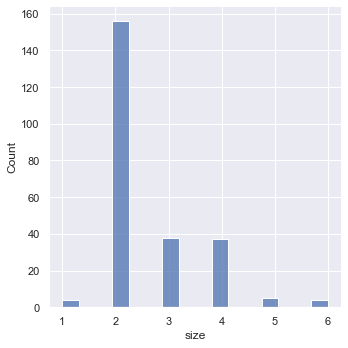

In [130]:
tips = sns.load_dataset('tips')

sns.displot(
    tips,
    x='size'
)

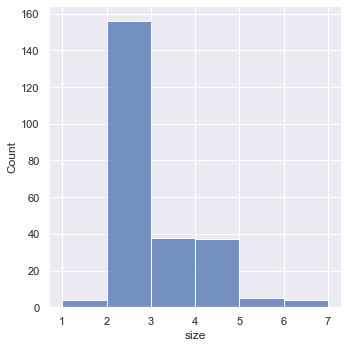

In [131]:
# bins 也可以用來指定每個 bin 的上下限
sns.displot(
    tips,
    x='size',
    bins=[1, 2, 3, 4, 5, 6, 7]
)

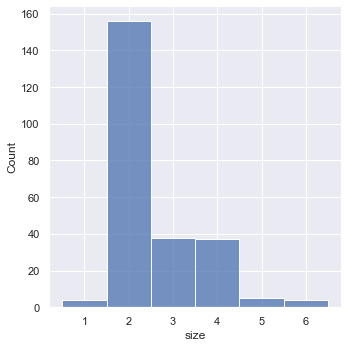

In [132]:
# 用 discrete 來設定 bin
# 會選用變數的唯一值當 bin 的中間值
sns.displot(
    tips,
    x='size',
    discrete=True # 圖中 bin 的值會在 bin 的中間
)

* categorical variable 也可以畫 histogram
  * categorical variables 變成 discrete bins

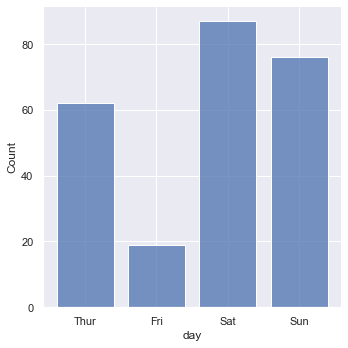

In [133]:
# 畫 categorical variable
sns.displot(
    tips,
    x='day',
    shrink=.8 # 用 shrink 縮小 bin 與 bin 之間的距離
)

### Conditioning on other variables

* 用 `hue` 參數可以選出子集，然後用不同的顏色區分
  * 不同的子集在畫圖時會重疊在一起
    * 可以用 `element='step'`
    * 可以用 `multiple='stack'` 把 histograms 一個一個疊上去
    * 可以用 `multiple='dodge'` 把不同的子集的 histogram 的長條分開畫
    * 用 `col=`, `row=` 來把不同的 histogram 畫在不同的圖上

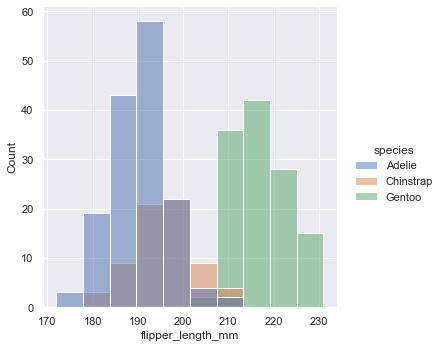

In [134]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species'
)

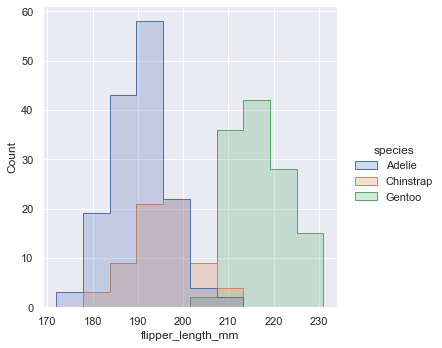

In [135]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    element='step' # 變成不是一條一條的 bar 組成的 histogram，而是像 root 畫出來的那種
)

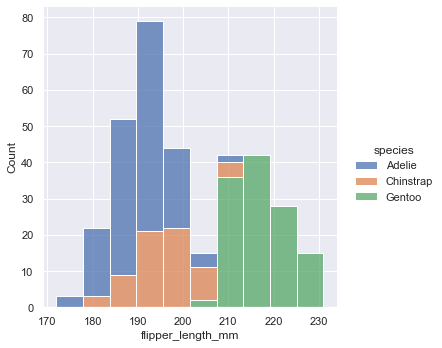

In [136]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack'
)

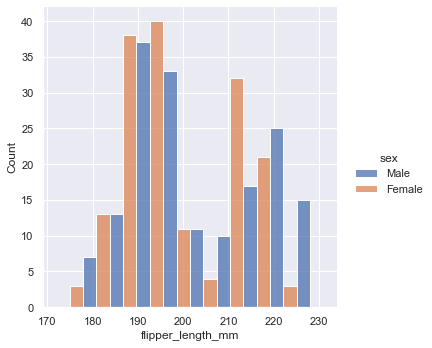

In [137]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='sex',
    multiple='dodge' # 把不同子集的 bar 分開畫
)

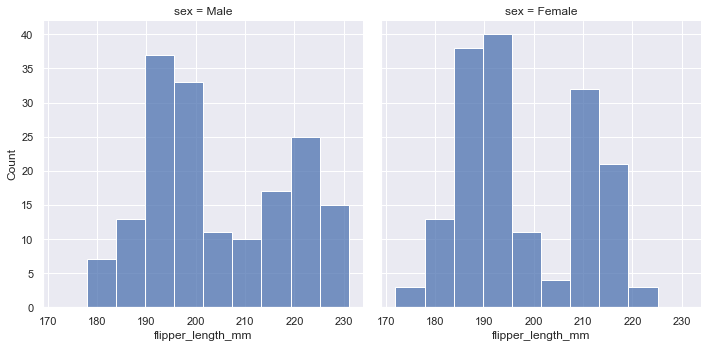

In [138]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    col='sex', # 會依照 col 指定的欄位畫 N 張不同的 histogram，N 是該欄位有多少唯一的值
    multiple='dodge'
)

### Normalized histogram statistics

* `stat='density'` 把整個 histogram 做歸一化，整個 histogram 的面積和 = 1
* `stat='probability'` 把 histogram 做歸一化，所有 bars 的高的總和 = 1
* 加上 `common_norm=False` 會把個別子集的 histograms 做歸一化

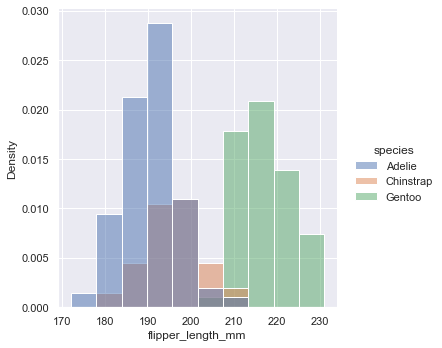

In [139]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    stat='density' # 因為有使用 hue，所以有很多子集，但是這只對整張圖做歸一化 (其實就 rescale histogram 的高度而已)
)

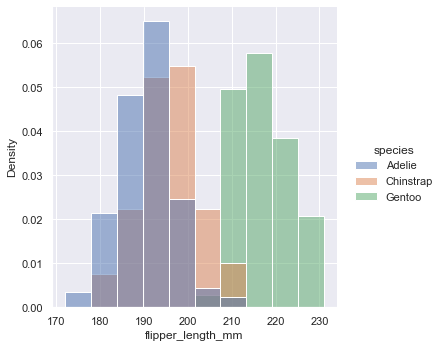

In [140]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    stat='density',
    common_norm=False # 加了這個才會對個別子集的 histograms 做歸一化
)

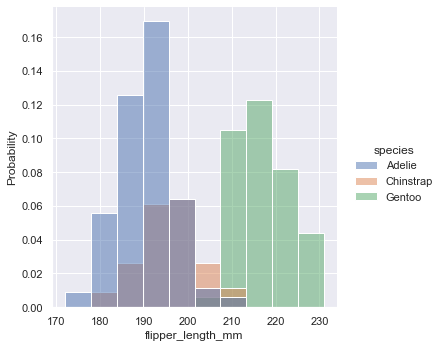

In [141]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    stat='probability'
)

## Kernel density estimation

* Histogram 和 Kernel density estimation (KDE) 都是要用來近似 probability density function
  * Histogram 用不連續的 bins 來近似
  * KDE 用 Gaussian kernel 來產生平滑且連續的分佈

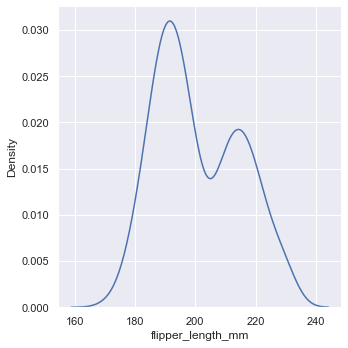

In [142]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    kind='kde'
)

### Choosing the smoothing bandwidth

* KDE 用 bandwith 來控制平滑的程度
  * over-smoothed: 會使得有意義的特徵消失
  * under-smoothed: 會產生很多 random noise 造成看不到真正重要的部分

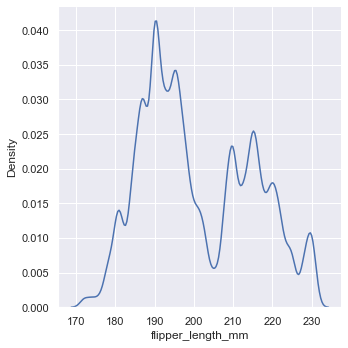

In [144]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    kind='kde',
    bw_adjust=.25 # 較小的 bandwidth 就比較不平滑
)

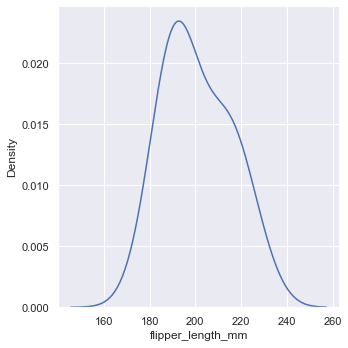

In [145]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    kind='kde',
    bw_adjust=2 # 較大的 bandwidth 就模糊了真正的分佈
)

### Conditioning on other variables

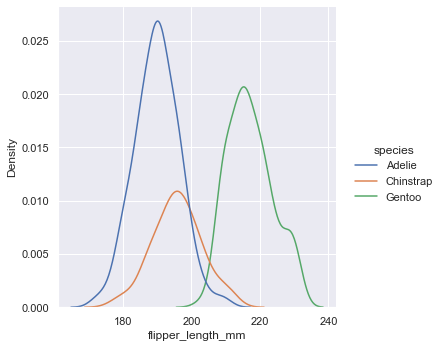

In [146]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    kind='kde'
)

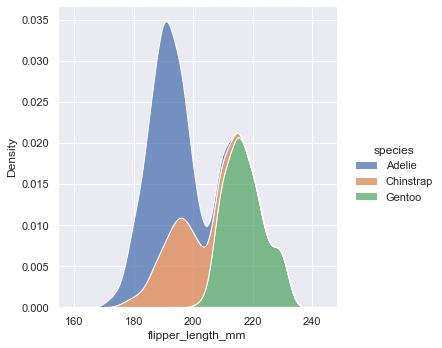

In [147]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    kind='kde',
    multiple='stack' # 分佈疊在另一個分佈上面，用 stack 時顏色是填滿的
)

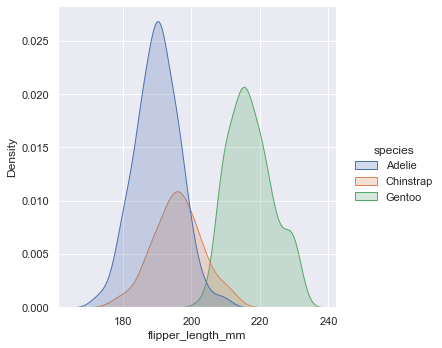

In [148]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    kind='kde',
    fill=True # 如果不是 stack 則預設是畫線而以，要用 fill 來強制填顏色
)

### Kernel density estimation pitfalls

* 如果變數有邊界，那 KDE 在畫圖時並不會考慮這個邊界
  * 例如變數要大於 0 但是 KDE 畫圖時會畫出小於 0 的部分
  * 可藉由 `cut` 在畫圖時加入邊界 (但實際上計算 KDE 時並不會考慮有邊界的情況，這裏純粹處理畫圖時的情形)
* KDE 會試著畫出平滑曲線，當資料不平滑的時候也會嘗試畫成平滑的

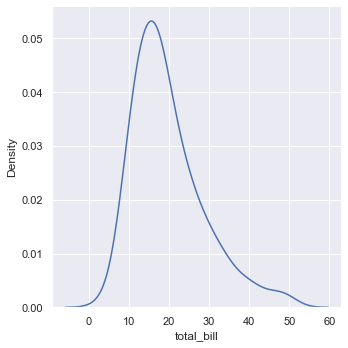

In [149]:
sns.displot(
    tips,
    x='total_bill',
    kind='kde'
)

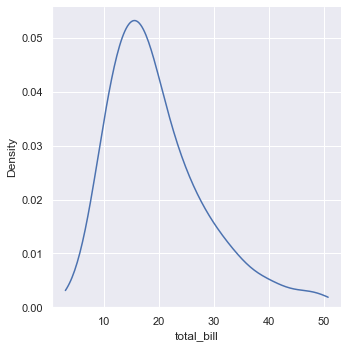

In [150]:
sns.displot(
    tips,
    x='total_bill',
    kind='kde',
    cut=0 # 畫圖時加入邊界
)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

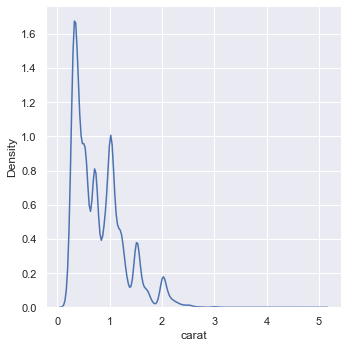

In [152]:
diamonds = sns.load_dataset('diamonds')
display(diamonds.head())

sns.displot(
    diamonds, 
    x='carat',
    kind='kde'
)

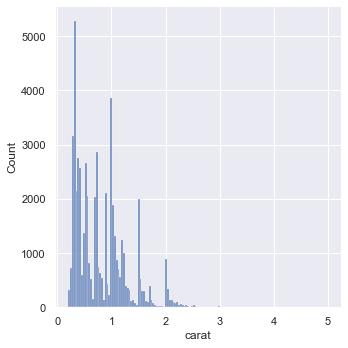

In [153]:
sns.displot(
    diamonds,
    x='carat'
)

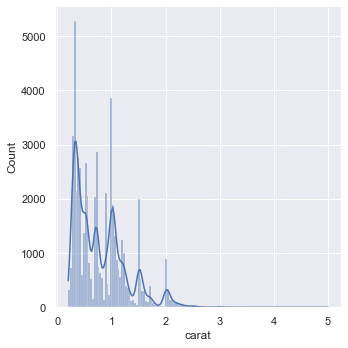

In [154]:
sns.displot(
    diamonds,
    x='carat',
    kde=True # 可以在 histogram 圖中加上 kde
)

## Empirical cumulative distributions

* ECDF: empirical cumulative distribution function
  * 是單調遞增的曲線
  * x 對應的 y (曲線的高度) 表示了有多少比例的資料比當前的值 x 還小
* 很適合用來比較許多不同的分佈
* ECDF 表示資料的分佈的方式，比較沒有 histogram 和 KDE 那麼直覺

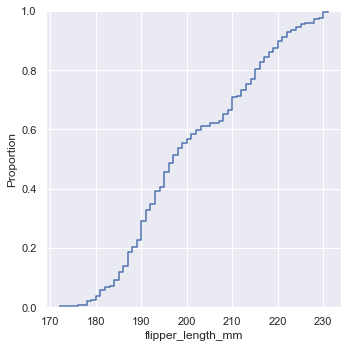

In [155]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    kind='ecdf'
)

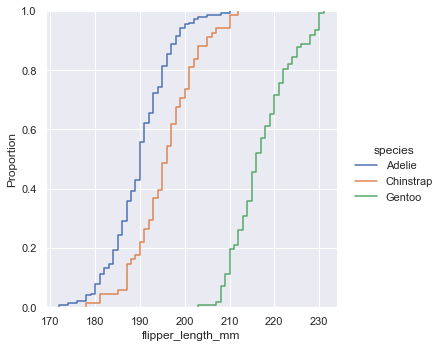

In [156]:
sns.displot(
    penguins,
    x='flipper_length_mm',
    hue='species',
    kind='ecdf'
)

## Visualizing bivariate distributions

* bivariate histogram 畫出來的圖像是 heatmap
* bivariate KDE 畫出來的圖像是等高線圖
* 加入 hue 的話，會用不同顏色表示
  * bivariate histogram 圖會變的比較不容易看，除非分佈之間有間距隔開
  * bivariate KDE 圖適合用來有多少部份重疊了

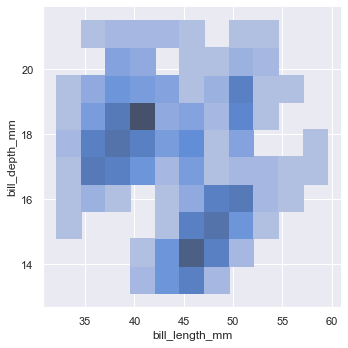

In [157]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

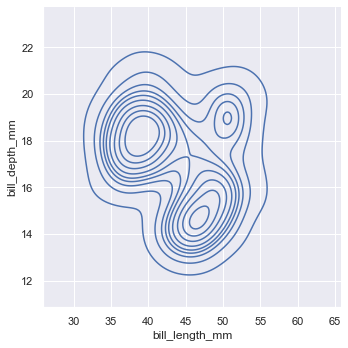

In [158]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde'
)

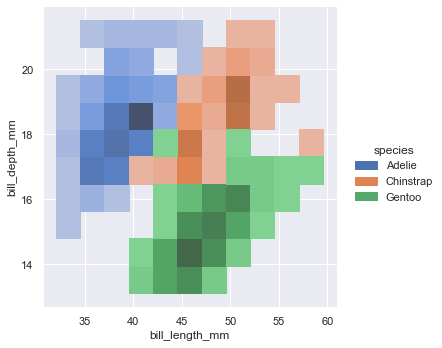

In [159]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

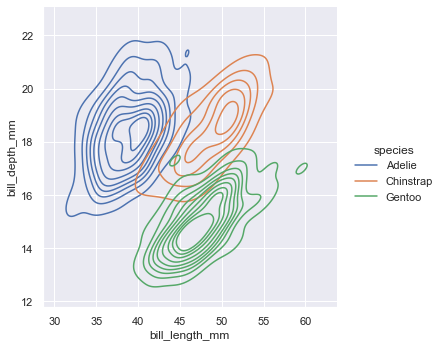

In [160]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    kind='kde'
)

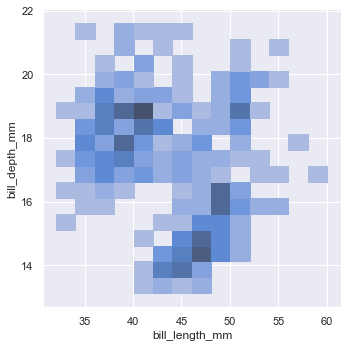

In [161]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    binwidth=(2, .5) # 因為是二維的圖，所以設置 x, y 的 bandwith
)

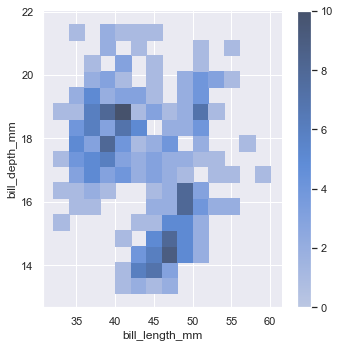

In [162]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    binwidth=(2, .5), # 因為是二維的圖，所以設置 x, y 的 bandwith
    cbar=True # 加上一個 colorbar 來方便閱讀
)

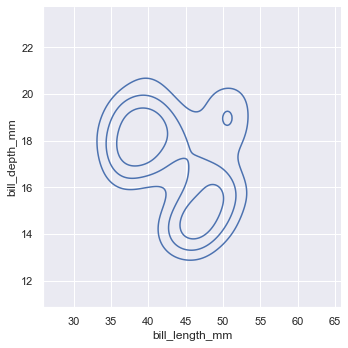

In [163]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    thresh=.2, # 從 level 等於多少開始畫 coutour
    levels=4 # 有幾條 coutour 線
)

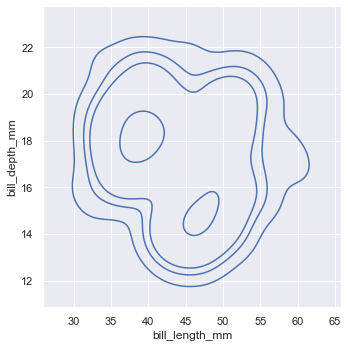

In [164]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    levels=[.01, .05, .1, .8] # 這指定了要畫 level 等於多少的 contour
)

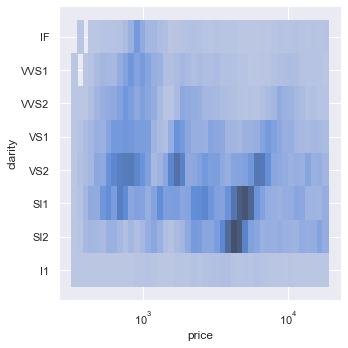

In [165]:
# x, y 可以使用連續或是不連續的變量
sns.displot(
    diamonds,
    x='price', # 連續的
    y='clarity', # 不連續的
    log_scale=(True, False)
)

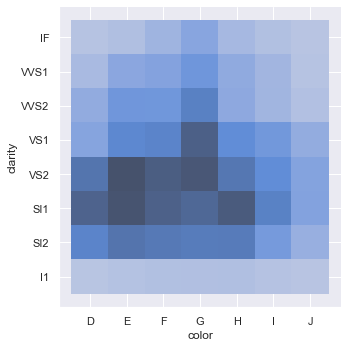

In [167]:
# x, y 可以使用連續或是不連續的變量
sns.displot(
    diamonds,
    x='color', # 不連續的
    y='clarity' # 不連續的
)

## Distribution visualization in other settings

* `jointplot()` 是 `JointGrid()` 的一個介面而已，可以直接用 `JointGrid()` 做更多的操作
* `pairplot()` 是 `PairGrid()` 的一個介面而已，可以直接用 `PairGrid()` 做更多的操作

### Plotting joint and marginal distributions

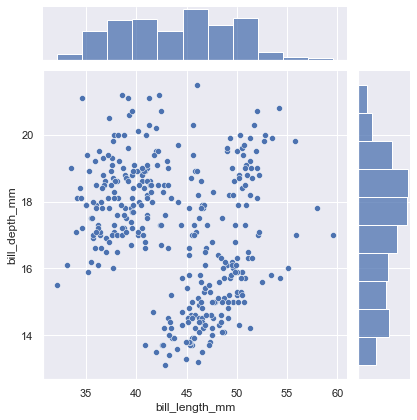

In [168]:
# 預設中間是 scatter plot 兩側是 histogram
sns.jointplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

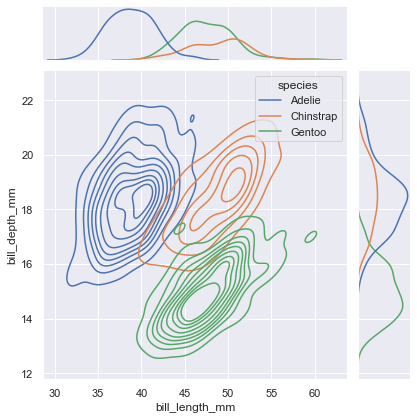

In [170]:
# 中間是 2D KDE 兩側是 1D KDE
sns.jointplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    kind='kde'
)

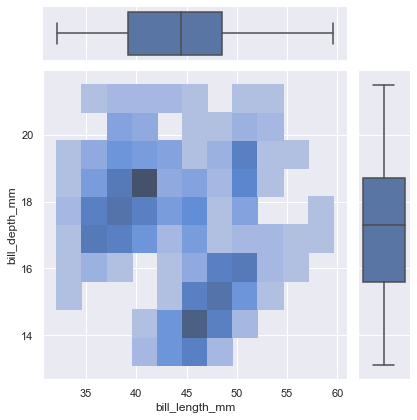

In [172]:
# 直接操作 JointGrid()
g = sns.JointGrid(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

# 呼叫 sns 的 axes-level function，且只用函數名字呼叫，後面不用加括號
g.plot_joint(sns.histplot) # 中間用 2D histogra,
g.plot_marginals(sns.boxplot) # 兩側用 boxplot

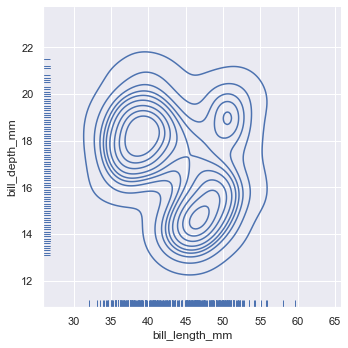

In [173]:
sns.displot(
    penguins,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde',
    rug=True # 會在軸上加上小 tick 每一個 tick 表示一個 observation
)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

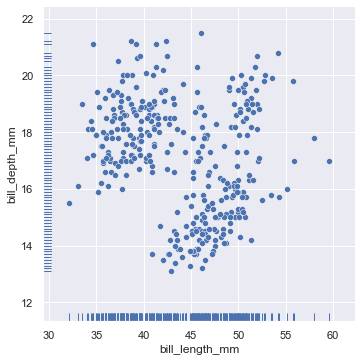

In [174]:
sns.relplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

# rugplot() 是 axes-level 的，可以加到任何一個圖的軸上
sns.rugplot(
    data=penguins,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### Plotting many distributions

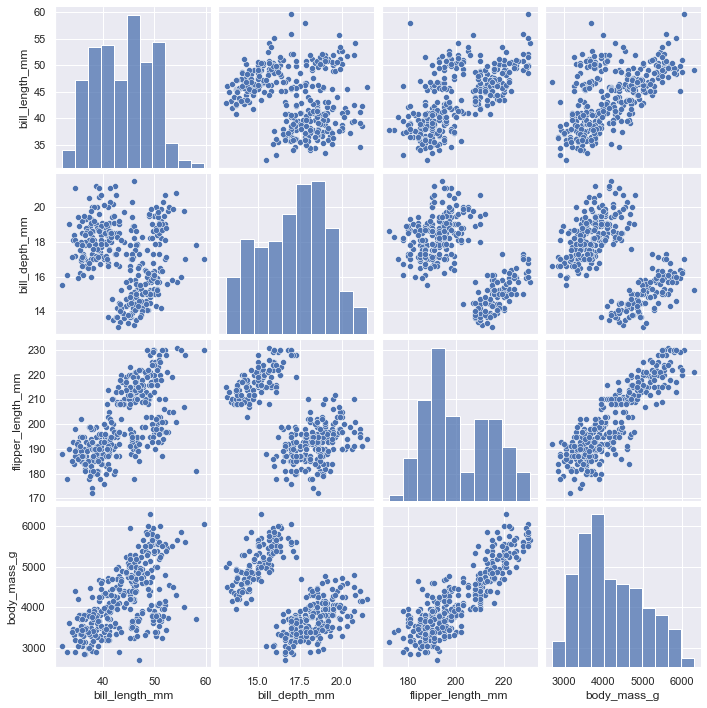

In [175]:
sns.pairplot(penguins)

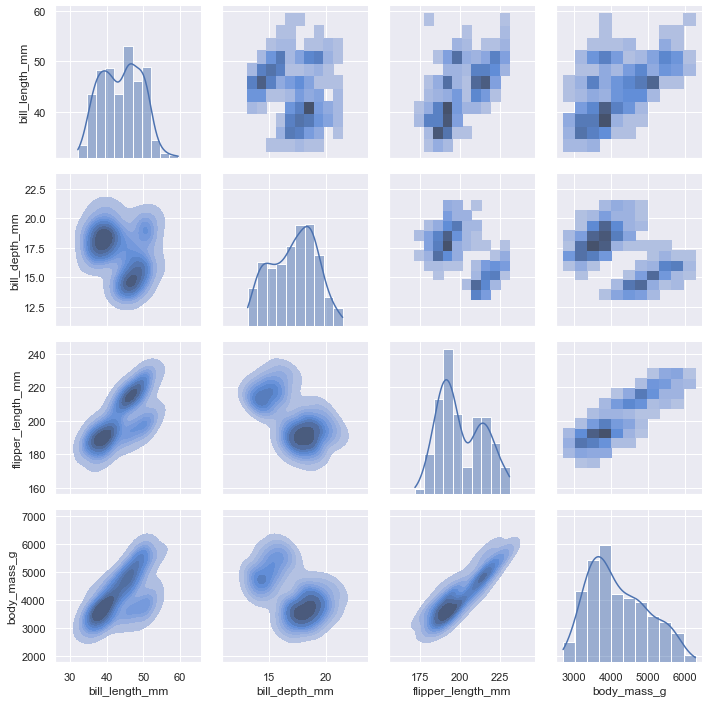

In [176]:
# 直接操作 PairGrid
g = sns.PairGrid(penguins)

# 呼叫 sns 的 axes-level function，且只用函數名字呼叫，後面不用加括號
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True) # fill 是要餵給 kdeplot 的參數
g.map_diag(sns.histplot, kde=True) # kde 是要餵給 histplot 的參數

---

# Plotting with categorical data

* Ref: [https://seaborn.pydata.org/tutorial/categorical.html](https://seaborn.pydata.org/tutorial/categorical.html)

* `catplot()` 是 figure-level，用來畫 categorical variables 的關係
* `catplot()` 有下面幾種 axes-level 的函數，可以用 `kind` 來呼叫
  * Categorical scatter plots
    * `stripplot()`: `kind="strip"` 也是預設值
    * `swarnplot()`: `kind="swarm"`
  * Categorical distribution plots
    * `boxplot()`: `kind="box"`
    * `violinplot()`: `kind="violin"`
    * `boxenplot()`: `kind="boxen"`
  * Categorical estimate plots
    * `pointplot()`: `kind="point"`
    * `barplot()`: `kind="bar"`
    * `countplot()`: `kind="count"`
  * 這些函數使用不同程度的 granularity
  * 只支援 `hue` 並不支援 `size` 和 `style`

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks', color_codes=True)

## Categorical scatterplots

* `catplot()` 預設是畫 scatter plot
  * 有兩種 categorical scatter plots
    * `stripplot()`，是 `catplot()` 預設的 `kind`，把所有相同類別的點畫在同一個變數的軸上面
    * `swarmplot()` 會讓點不會重疊，但是只適合用在小的數據集，用這畫出來的圖叫做 beeswarm

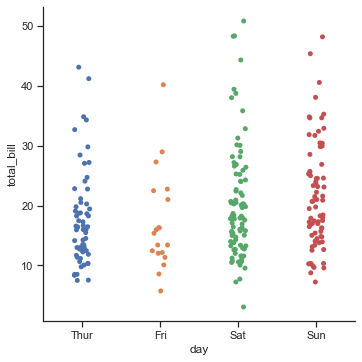

In [179]:
tips = sns.load_dataset('tips')
sns.catplot(
    data=tips,
    x='day',
    y='total_bill'
)

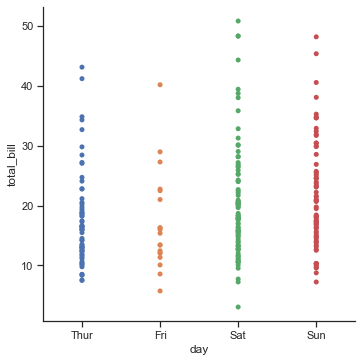

In [181]:
sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    jitter=False # jitter 控制點要不要有點散開
)

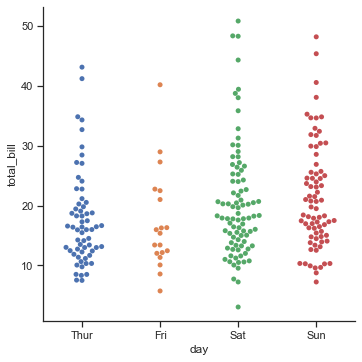

In [182]:
sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    kind='swarm' # swarmplot 畫出的點和點之間不會重疊
)

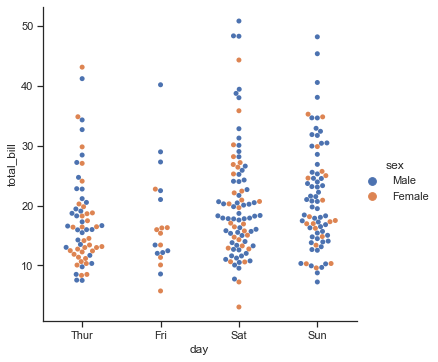

In [183]:
sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='sex', # 可以使用 hue 但是不能用 size 和 style
    kind='swarm'
)

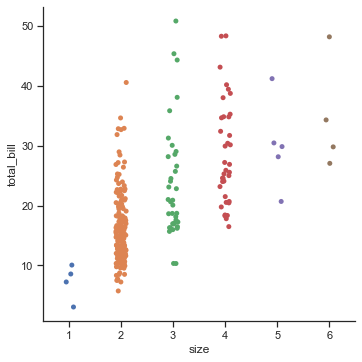

In [184]:
# 如果傳入的資料是 pandas.Categorical 型態，那就按照順序排序
# 如果傳入的資料是數值的型態，就按照數字大小排序
sns.catplot(
    data=tips,
    x='size',
    y='total_bill'
)

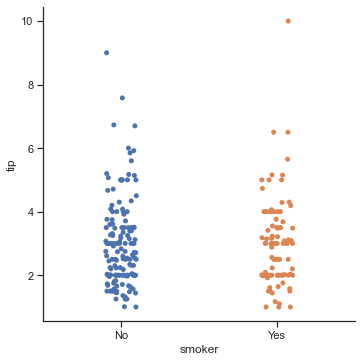

In [185]:
sns.catplot(
    data=tips,
    x='smoker',
    y='tip',
    order=['No', 'Yes'] # 可以用 order 參數來設定 categorical 變數的順序
)

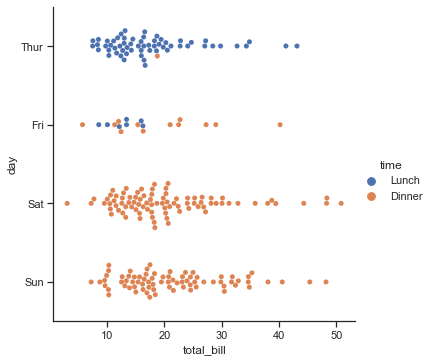

In [186]:
sns.catplot(
    data=tips,
    x='total_bill',
    y='day',
    hue='time',
    kind='swarm'
)

## Distributions of observations within categories

* categorical scatter plot 只適用於小數據集，大的數據集用其他的圖比較合適

### Boxplots

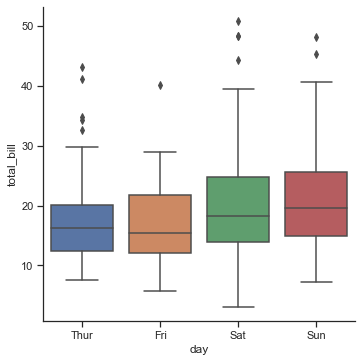

In [187]:
sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    kind='box'
)

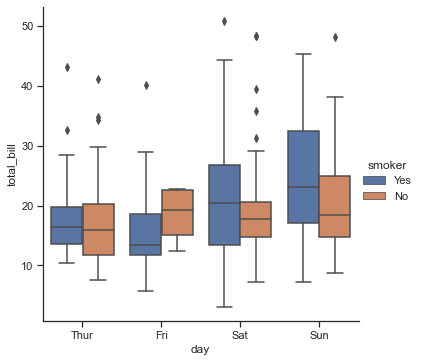

In [188]:
sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='smoker', # 加入 hue 的話 box 會分開畫，才不會重疊在一起，這個行為叫做 dodging
    kind='box'
)

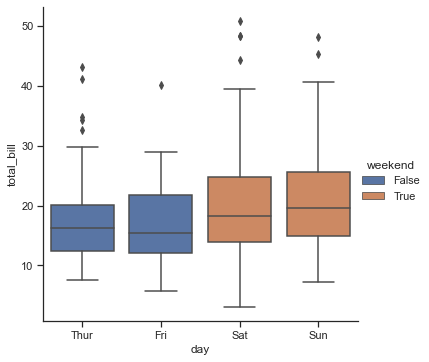

In [191]:
tips['weekend'] = tips['day'].isin(['Sat', 'Sun'])

sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='weekend',
    kind='box',
    dodge=False # 也可以把 dodge 關掉
)

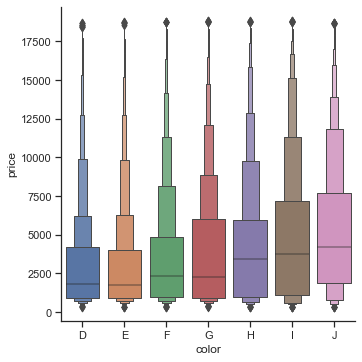

In [192]:
diamonds = sns.load_dataset('diamonds')

sns.catplot(
    data=diamonds.sort_values('color'),
    x='color',
    y='price',
    kind='boxen' # 適合大數據集，還會用 box 表示分佈的形狀
)

### Violinplots

* 就像是 boxplot 加上 KDE plot 的結合
* quartile 和 whisker 是顯示在 violin 裡面

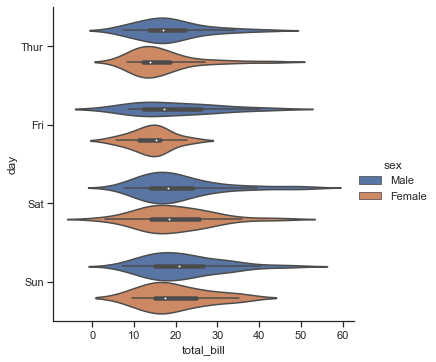

In [193]:
sns.catplot(
    data=tips,
    x='total_bill',
    y='day',
    hue='sex',
    kind='violin'
)

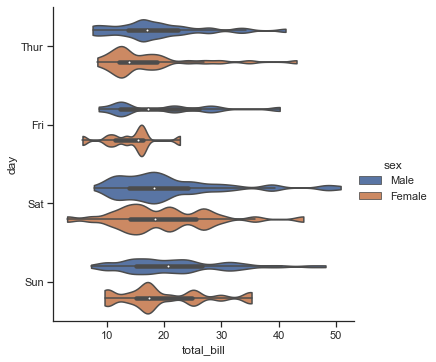

In [194]:
sns.catplot(
    data=tips,
    x='total_bill',
    y='day',
    hue='sex',
    kind='violin',
    bw=.15, # bw 是 KDE plot 的參數
    cut=0 # cut 是 KDE plot 的參數，畫圖時只畫比 0 大的部分
)

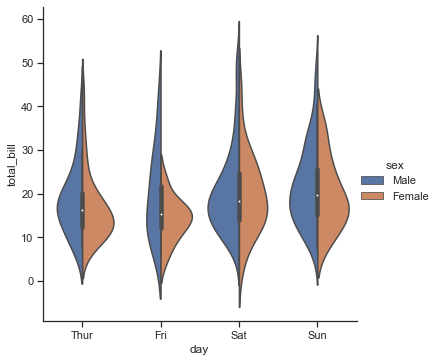

In [195]:
sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    kind='violin',
    split=True # 加入 split 的話 hue 的結果就一人一半
)

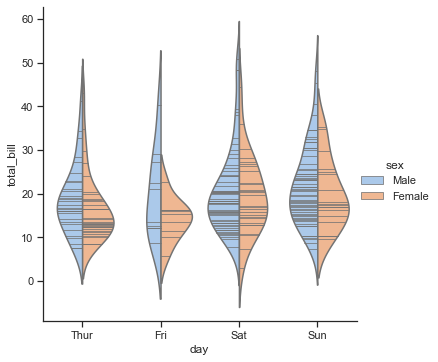

In [196]:
sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    hue='sex',
    kind='violin',
    inner='stick',
    split=True,
    palette='pastel'
)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

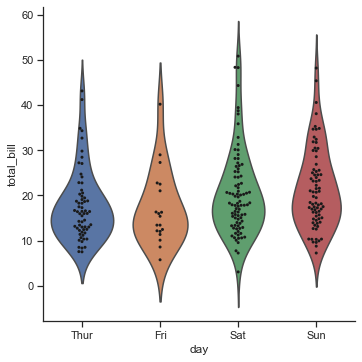

In [197]:
g = sns.catplot(
    data=tips,
    x='day',
    y='total_bill',
    kind='violin',
    inner=None,
)

sns.swarmplot(
    data=tips,
    x='day',
    y='total_bill',
    color='k',
    size=3,
    ax=g.ax # 利用這個，把 swarmplot 畫到 violin plot 裡面
)

In [ ]:
## Statistical estimation within categories

### Bar  plots

In [ ]:
### Point plots

In [ ]:
## Plotting "wide-form" data

In [ ]:
## Showing multiple relationships with facets